<div class="alert alert-block alert-success">
<h1> Machine Learning - Project Cars4You</h1>
<h2> Group 36 </h2>
<h3> 20225/2026 </h3>

***

## **Table of Contents**<br>

[1. **Importing libraries & Data**](#1-Importing-libraries-&-Data)<br>

[2. Exploratory Data Analysis](#2-Exploratory-Data-Analysis)<br>
- [2.1 Inconsistencies](#21-Inconsistencies)<br>
    - [2.1.1 Adress Inconsistencies](#211-Adress-Inconsistencies)<br>
- [2.2 Variable Exploration](#22-Variable-Exploration)<br>
    - [2.2.1 Univariate Analysis](#221-Univariate-Analysis)<br>
    - [2.2.2 Bivariate Analysis](#222-Bivariate-Analysis)<br>


[3. Data Cleaning & Preprocessing](#3-Data-Cleaning-&-Preprocessing)<br>
- [3.1 Duplicates](#31-Duplicates)<br>
- [3.2 Feature Engineeering](#32-Feature-Engineeering)<br>
    - [3.2.1 Feature Creation](#321-Feature-Creation)<br>
    - [3.2.2 Data Type Conversions](#322-Data-Type-Conversions)<br>
    - [3.2.3 Encoding before Train-Test Split](#323-Encoding-before-Train-Test-Split)<br>
    
[4 Export](#4-Export)<br>
    

***

This notebook will consist of Exploratory Data Analysis and Data Cleaning and Preprocessing. To explore the data, several statistical methods and visualisations were used. In the Data Cleaning and Preprocessing, Duplicates will be addressed, Feature Engineering will be performed. Then the treated data will be exported to be used in the following notebooks.

> Student Name - Artem Polikarpov
>> 20250443

> Student Name - Diogo Montenegro
>> 20250491

> Student Name - Francisco Martins
>> 20250482

> Student Name - João Cardoso
>> 20240529 


***

# 1. Importing libraries & Data

Import core libraries, configure plotting, and register helper functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

# Custom functions and variables
from functions import histogram_boxplot, labeled_barplot, stacked_barplot, distribution_plot_wrt_target, comparative_boxplot, comparative_barplot, detect_outliers_iqr
from vocab_prep import BRAND_MODEL_VOCAB

pd.set_option('display.max_rows', 500)


#### Data Loading

Load train/test CSVs; keep raw copies separate from working copies.

In [2]:
# this loads the train data 
train_raw = pd.read_csv('project_data/train.csv')

# this loads the test data
test_raw = pd.read_csv('project_data/test.csv')

#print first five rows of the training data
train_raw.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


**Verify that carID can be used as index**

In [3]:
train_raw['carID'].is_unique

True

In [4]:
train_raw['carID'].isna().any()

False

**Set carID as index**

In [5]:
# setting carID as index
train_raw.set_index('carID')

# sorting by index
train_raw.sort_index(inplace =True)

# displaying the first three rows
train_raw.head(3)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.0,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.0,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.0,0.0


# 2. Exploratory Data Analysis

In this section we try to comprehend dataset's structure, adress inconsistencies and comprehend statistical proprities. This section will serve as a foundation for subsequent data preprocessing and model developlement, ensuring informed data-driven decisions.

In [6]:
# creating a copy to on, and not directly in train/test_raw
train = train_raw.copy()

test = test_raw.copy()

Employing methods such as `describe`, `info` and `sample`, to make a quick overview of the data

In [7]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carID,75973.0,NaN,NaN,NaN,37986.0,21931.660338,0.0,18993.0,37986.0,56979.0,75972.0
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8


In [8]:
# let's check the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [9]:
# let's check a sample of the data
train.sample(10)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
34316,20201,Ford,EcoSport,2016.0,11000,Manual,2700.0,Petrol,125.0,53.3,1.0,47.0,1.0,0.0
56659,14694,BMW,2 Series,2018.0,16750,Manual,13052.0,Diesel,145.0,64.2,2.0,65.0,3.0,0.0
27171,35492,Mercedes,C Class,2019.0,24998,NaN,16103.0,Petrol,NaN,NaN,1.5,53.0,4.0,0.0
70545,26502,Ford,C-MAX,2017.0,9980,Manual,70860.0,NaN,30.0,55.4,1.0,36.0,3.0,0.0
25780,18660,Ford,EcoSport,2019.0,16800,Automatic,5177.0,Petrol,145.0,44.1,1.0,58.0,3.0,0.0
53864,9700,BMW,X5,2019.0,50900,Automatic,99.0,Diesel,145.0,37.7,3.0,57.0,0.0,0.0
62185,20860,Ford,Focus,2018.0,15995,Manual,900.0,Petrol,NaN,NaN,1.0,47.0,3.0,0.0
20170,43707,Mercedes,C Class,2019.0,23254,Automatic,12605.0,Diesel,NaN,NaN,2.0,80.0,4.0,0.0
18208,11665,BMW,NaN,2019.0,23726,Automatic,8848.0,Petrol,145.0,38.7,2.0,32.0,4.0,0.0
27862,57690,Opel,Mokka X,2018.0,10397,Manual,21117.0,Petrol,NaN,47.1,1.4,94.0,1.0,0.0


## 2.1 Inconsistencies

In this section we identify casing/typos, out‑of‑domain values, negatives, and non‑integer fields using methods shuch as `unique` and `loc`.

**Brand** - Has Typing errors

In [10]:
# display all unique values 
train['Brand'].unique()

array(['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
       'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', nan,
       'yundai', 'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel',
       'For', 'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD',
       'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA',
       'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod',
       'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI',
       'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede',
       'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod',
       'toyot'], dtype=object)

In [11]:
# change all values to lower case and strip starting and ending spaces
train['Brand'] = train['Brand'].str.lower().str.strip()

np.array(sorted(train['Brand'].dropna().unique()))

array(['aud', 'audi', 'bm', 'bmw', 'ercede', 'ercedes', 'for', 'ford',
       'hyunda', 'hyundai', 'kod', 'koda', 'mercede', 'mercedes', 'mw',
       'ope', 'opel', 'or', 'ord', 'oyota', 'pe', 'pel', 'skod', 'skoda',
       'toyot', 'toyota', 'ud', 'udi', 'v', 'vw', 'w', 'yunda', 'yundai'],
      dtype='<U8')

In [12]:
train['Brand'].isna().sum()

1521

**model** - Has Typing errors

In [13]:
print(f'The number of unique model values is {train['model'].unique().size}')

The number of unique model values is 736


In [14]:
# change all values to lower case and strip starting and ending spaces
train['model'] = train['model'].str.lower().str.strip()

print(f'After lowercase and strip the number of unique values is {train['model'].unique().size}')

After lowercase and strip the number of unique values is 297


In [15]:
train['model'].unique()

array(['golf', 'yaris', 'q2', 'fiesta', '2 series', '3 series', 'a3',
       'octavia', 'passat', 'focus', 'insignia', 'a clas', 'q3', 'fabia',
       'a class', 'ka+', 'glc class', 'i30', 'c class', 'polo', 'e class',
       'c clas', 'q5', 'up', 'c-hr', 'mokka x', 'corsa', 'astra', 'tt',
       '5 series', 'aygo', '4 series', 'slk', 'viva', 't-roc', 'ecosport',
       'tucson', 'ecospor', nan, 'x-class', 'cl class', 'ix20', 'i20',
       'rapid', 'a1', 'auris', 'sharan', 'adam', 'x3', 'a8', 'gls class',
       'b-max', 'a4', 'kona', 'i10', 'mokka', 's-max', 'x2',
       'crossland x', 'tiguan', 'a5', 'gle class', 'zafira', 'ioniq',
       'a6', 'mondeo', 'yeti outdoor', 'x1', 'scala', 's class',
       '1 series', 'kamiq', 'kuga', 'tourneo connect', 'q7', 'gla class',
       'arteon', 'sl class', 'santa fe', 'grandland x', 'i800', 'rav4',
       'touran', 'citigo', 'focu', 'roomster', 'prius', 'corolla',
       'fiest', 'b class', 'q', 'kodiaq', 'v class', 'e clas',
       'caddy max

In [16]:
train['model'].isna().sum()

1517

**transmission** - Has Typing errors

In [17]:
train['transmission'].unique()

array(['Semi-Auto', 'Manual', 'anual', 'Semi-Aut', 'Automatic', 'manual',
       nan, 'unknown', 'Manua', 'AUTOMATIC', 'MANUAL', 'semi-auto',
       ' Manual ', 'automatic', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT',
       'Automati', 'ANUAL', 'utomatic', 'unknow', 'EMI-AUTO', 'manua',
       'anua', 'emi-Aut', 'MANUA', 'emi-auto', 'UTOMATIC', ' manual ',
       ' MANUAL ', 'UNKNOWN', 'nknown', 'automati', 'Other', 'semi-aut',
       ' Manual', 'AUTOMATI', 'utomati', 'Manual ', 'manual ', 'nknow'],
      dtype=object)

In [18]:
# change all values to lower case and strip starting and ending spaces
train['transmission'] = train['transmission'].str.lower().str.strip()

np.array(sorted(train['transmission'].dropna().unique()))

array(['anua', 'anual', 'automati', 'automatic', 'emi-aut', 'emi-auto',
       'manua', 'manual', 'nknow', 'nknown', 'other', 'semi-aut',
       'semi-auto', 'unknow', 'unknown', 'utomati', 'utomatic'],
      dtype='<U9')

In [19]:
train['transmission'].isna().sum()

1522

In [20]:
len(train.loc[train['transmission'] == 'unknown'])

704

In [21]:
train['transmission'].isna().sum()

1522

**fuelType** -Has Typing errors

In [22]:
train['fuelType'].unique()

array(['Petrol', 'Diesel', 'etrol', 'Hybrid', 'diesel', 'iesel', nan,
       'petrol', 'PETROL', 'Diese', 'Petro', 'DIESEL', 'petro', 'HYBRID',
       'ybri', 'Other', 'DIESE', 'Hybri', 'ETROL', 'ybrid', 'PETRO',
       'hybrid', 'IESEL', 'Electric', 'ther', 'iese', 'etro', 'ETRO',
       'diese', 'Othe', 'YBRID', 'HYBRI', 'OTHER', 'other', 'IESE'],
      dtype=object)

In [23]:
# change all values to lower case and strip starting and ending spaces
train['fuelType'] = train['fuelType'].str.lower().str.strip()

np.array(sorted(train['fuelType'].dropna().unique()))

array(['diese', 'diesel', 'electric', 'etro', 'etrol', 'hybri', 'hybrid',
       'iese', 'iesel', 'othe', 'other', 'petro', 'petrol', 'ther',
       'ybri', 'ybrid'], dtype='<U8')

In [24]:
len(train.loc[train['fuelType'] == 'other'])

155

In [25]:
train['fuelType'].isna().sum()

1511

**year** - Has Non int values

In [26]:
print(train['year'].unique())
print("")
print(f'The number of rows with non-integer year values are: {train.loc[(train['year'] != round(train['year'])) & (train['year'].notna()), ['year']].size}')

[2016.         2019.         2018.         2014.         2017.
 2020.         2013.                   nan 2015.         2023.36707842
 2011.         2012.         2023.1169636  2003.         2009.
 2007.         2005.         2011.11118842 2011.21085349 2023.97731126
 2004.         2010.         2010.56500919 2008.         2024.12175905
 2006.         2023.60527574 2023.38982198 2010.67696784 2001.
 2000.         2023.26798867 2010.26863473 2010.37154646 2002.
 2022.69668507 2009.81675711 2010.7464032  2012.69574039 1996.
 1998.         2022.87800554 1970.         1999.         1997.        ]

The number of rows with non-integer year values are: 723


In [27]:
# lets see the rows where year is not integer and not nan
train[(train['year'] != round(train['year'])) & (train['year'].notna())].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
47953,6673,audi,a7,2010.371546,25950,semi-auto,27431.0,diesel,145.0,52.300000,3.0,3.115295,2.0,0.0
42739,73093,vw,golf,2010.746403,14026,manual,11645.0,petrol,20.0,60.100000,1.4,51.000000,0.0,0.0
24455,35448,mercedes,c class,2011.210853,33599,semi-auto,2679.0,diesel,145.0,57.700000,2.0,40.000000,0.0,0.0
24549,28374,ford,focus,2010.676968,24900,manual,10836.0,diesel,145.0,50.400000,2.0,67.000000,4.0,0.0
6313,39792,mercedes,glc class,2011.210853,25890,automatic,9848.0,diesel,145.0,100.998943,2.1,78.000000,0.0,0.0


**mileage** - Has negative values

In [28]:
print(f'The number of rows with negative mileage values is: {train.loc[train['mileage'] < (0), ['mileage']].size}')

The number of rows with negative mileage values is: 369


In [29]:
# lets see the rows where mileage is negative
train.loc[train['mileage'] < 0].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
7840,30017,ford,edge,2016.0,20799,automatic,-42650.453719,diesel,200.0,47.9,2.0,83.0,0.0,0.0
6412,32293,NaN,i800,2018.0,14900,unknown,-36635.042697,diesel,150.0,37.7,2.5,37.0,2.0,0.0
75859,55820,oyota,aygo,2019.0,8491,manual,-39765.602338,petrol,145.0,56.5,1.0,56.0,0.0,0.0
21909,20076,ford,ka,2018.0,9599,manual,-42650.453719,petrol,150.0,43.5,1.2,33.0,4.0,0.0
27681,35789,mercedes,c class,NaN,20771,semi-auto,-50755.210230,diesel,145.0,60.1,2.1,99.0,3.0,0.0


**tax** - Has negative and neutral values

In [30]:
print(train['tax'].unique())
print("")
print(f'The number of rows with negative tax values is: {train.loc[train['tax'] < (0), ['tax']].size}')

[         nan 145.          30.          20.         150.
 160.         -56.19320154   0.         125.         200.
 250.         135.         300.         205.         260.
 326.02823317 325.         -45.78061049 265.         305.
 303.14889146 235.         299.47350391 240.         165.
 140.         540.         155.         220.         120.
 330.         290.48678508 -20.24107949 -18.33074314 327.91577835
 270.         115.         185.         316.48718937 570.
 -49.15354066 316.29630636 -60.6840948  555.         277.38425448
 -91.12163048  10.         315.         190.         -31.91494466
 230.         -43.24208237 294.84340933 195.         580.
 290.         130.         565.         210.         280.
 255.         520.         295.         245.         110.
 535.        ]

The number of rows with negative tax values is: 378


In [31]:
# lets see the rows where tax is negative
train.loc[train['tax'] < 0].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
11337,14614,NaN,2 series,2015.0,9295,manual,71670.0,diesel,-43.242082,68.9,2.0,83.0,1.0,0.0
70335,16121,ford,focus,2017.0,15997,manual,15164.0,petrol,-45.780610,41.5,2.0,55.0,2.0,0.0
49868,34806,hyundai,tucson,2015.0,12691,manual,14500.0,diesel,-31.914945,61.7,1.7,86.0,3.0,0.0
67228,38725,mercedes,glc class,2016.0,22792,semi-auto,36087.0,diesel,-56.193202,56.5,2.1,39.0,4.0,0.0
8155,14254,bmw,x3,2015.0,19370,semi-auto,41312.0,diesel,-43.242082,54.3,2.0,61.0,0.0,0.0


In [32]:
#lets see the rows where tax is not integer and not nan and greater than 0
train[(train['tax'] != round(train['tax'])) & (train['tax'].notna()) & (train['tax'] > 0)].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
47554,10518,bmw,2 series,2019.0,18250,manual,6685.0,diesel,316.487189,65.7,2.0,50.0,1.0,0.0
23525,38214,mercedes,gl class,2015.0,17299,automatic,29520.0,diesel,326.028233,55.4,2.1,80.0,1.0,0.0
70538,35398,mercedes,gle class,2017.0,29462,NaN,17440.0,diesel,326.028233,47.9,2.1,48.0,3.0,0.0
52865,29564,ford,mondeo,2016.0,15200,automatic,13807.0,petrol,299.473504,44.8,1.5,72.0,3.0,0.0
31114,60728,opel,viva,2017.0,6128,manual,15000.0,petrol,290.486785,61.4,1.0,79.0,0.0,0.0


**mpg** - Has negative values

In [33]:
print(train['mpg'].unique())
print("")
print(f'The number of rows with negative mpg values is: {train.loc[train['mpg'] < (0), ['mpg']].size}')

[ 11.41726775  47.9         40.9         65.7         42.8
  60.1         68.9         62.8         67.3         54.3
  57.7                 nan  56.5         72.4         47.1
  44.1         46.3         32.5         48.7         74.3
  43.5         78.5         51.4         50.4         67.
  28.5         64.2         61.4         41.5         52.3
  53.3         44.8         35.8         80.7         37.2
  49.6         42.2         45.6         34.          74.4
  29.1         76.3         40.3         58.9         39.8
  55.4         40.4         78.4         83.1         33.2
  34.5         70.6         35.3         39.2         32.8
  34.9         61.7         30.         156.9         36.2
  58.          38.2         69.          37.7         57.6
  66.         151.04180955   9.42917895  85.6         58.8
  89.77369267  78.          30.4         36.7        235.
 134.5         27.70948954  88.32163955  88.3         56.6
 -43.42176751 100.99894302  31.          38.7         33.6

In [34]:
#lets see the rows where mpg is negative
train.loc[train['mpg'] < 0].sample(5)


,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
60334,14767,bmw,5 series,2019.0,30001,semi-auto,13000.000000,hybrid,140.000000,-43.421768,2.0,62.0,4.0,0.0
6306,14420,bmw,2 series,2015.0,17799,automatic,38902.000000,petrol,260.000000,-43.421768,3.0,33.0,4.0,0.0
73634,13140,bmw,1 series,2019.0,28488,automatic,6744.000000,petrol,-43.242082,-43.421768,1.5,57.0,3.0,0.0
56722,8691,bmw,1 series,2019.0,17600,automatic,12839.000000,diesel,145.000000,-43.421768,2.0,68.0,1.0,0.0
55334,13134,bmw,1 series,2016.0,11941,manual,-58540.574478,petrol,30.000000,-43.421768,1.5,70.0,2.0,0.0


**engineSize** - Has Negative and neutral values

In [35]:
print(train['engineSize'].unique())
print("")
print(f'The number of rows with negative engineSize values is: {train.loc[train['engineSize'] < (0), ['engineSize']].size}')
print(f'The number of rows with zero engineSize values is: {train.loc[train['engineSize'] == 0, ['engineSize']].size}')

[ 2.          1.5         1.          1.4         1.6                nan
  1.2         3.          1.8         2.1         1.3         0.7395339
  0.          2.3         1.1         4.          1.7         2.98579344
  2.2         2.5         2.61964142 -0.1034928   2.78177621  2.63120047
  3.72371217  0.15452932  4.2         3.2         2.9         2.8
  0.31340658  2.06411863  3.73923548  2.4         0.18642488  2.6631132
  5.2         0.19146242  5.          0.30707394  0.37112737  4.4
  6.2         3.82275785  1.9         0.6         6.6         5.5
  3.5         4.7         0.16286595  2.7         3.6         2.6
  4.3         5.4         4.5         4.1         6.        ]

The number of rows with negative engineSize values is: 84
The number of rows with zero engineSize values is: 180


In [36]:
#lets see the rows where engineSize is negative
train.loc[train['engineSize'] < 0].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
44680,30398,ford,fiesta,2017.0,10020,manual,15133.0,petrol,20.0,62.8,-0.103493,96.0,4.0,0.0
75085,23710,ford,fiesta,2015.0,8798,semi-auto,NaN,petrol,145.0,47.9,-0.103493,85.0,3.0,0.0
49001,20733,ford,focus,2018.0,11991,manual,24174.0,diesel,145.0,74.3,-0.103493,66.0,4.0,0.0
56598,21540,ford,focus,2017.0,11649,manual,23765.0,diesel,145.0,74.3,-0.103493,37.0,0.0,0.0
57317,19636,ford,ka,2017.0,7999,manual,18000.0,petrol,145.0,57.7,-0.103493,72.0,0.0,0.0


**paintQuality%** - Has %'s above 100 & non int values 

In [37]:
print(train['paintQuality%'].unique())
print("")
print(f'The number of rows with paintQuality% values above 100% is: {train.loc[train['paintQuality%'] > (100), ['paintQuality%']].size}')
print(f'The number of rows with non-integer paintQuality% values are: {train.loc[train['paintQuality%'] != round(train['paintQuality%']), ['paintQuality%']].size}')

[ 63.          50.          56.          97.          74.
  75.          59.          85.          35.          68.
  45.          30.          69.          53.          57.
  40.          60.          94.          33.          51.
  47.          87.          61.          83.          95.
  46.          54.          80.          77.          90.
  91.          71.          44.          38.          64.
  55.          66.          82.          41.          81.
  79.          72.          34.          88.                  nan
  43.          31.          32.          96.          84.
  70.          86.          92.          52.          39.
  42.          73.          78.          37.          65.
  93.          89.          99.          36.          62.
 125.10995148   3.1152953   67.         125.5694986   76.
  48.           3.17268306  49.           3.25476013 125.59430832
  98.          58.           3.20741784 125.4535988    3.14037046
   1.76947364   3.22574362 125.30194543 125.2020

In [38]:
#lets see the rows where paintQuality% is above 100% or non-integer and not nan
train.loc[(train['paintQuality%'] > 100) | (train['paintQuality%'] != round(train['paintQuality%'])) & (train['paintQuality%'].notna())].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
10981,41691,mercedes,c class,2019.000000,48491,automatic,11347.0,petrol,NaN,NaN,3.0,3.207418,1.0,0.0
47538,54470,toyota,c-hr,2018.000000,23799,automatic,9971.0,hybrid,135.0,74.3,1.8,125.594308,1.0,0.0
71028,38417,mercedes,a class,2023.977311,11000,automatic,51332.0,diesel,20.0,68.9,2.1,125.202033,3.0,0.0
47337,73359,vw,golf,2017.000000,11400,manual,36752.0,diesel,20.0,65.7,2.0,1.769474,0.0,0.0
67153,30857,ford,focus,2018.000000,11990,manual,12956.0,petro,NaN,NaN,1.0,125.109951,2.0,0.0


**previousOwners**	- Has negative & non int values

In [39]:
print(train['previousOwners'].unique())
print("")
print(f'The number of rows with negative previousOwners values is: {train.loc[train['previousOwners'] < (0), ['previousOwners']].size}')
print(f'The number of rows with non-integer previousOwners values are: {train.loc[train['previousOwners'] != round(train['previousOwners']), ['previousOwners']].size}')

[ 4.          1.         -2.34030622  3.          0.          2.
         nan -2.34565     6.25837066 -2.33512284  6.22789796  6.25823052
  6.23017958 -2.33936045  6.21772443  6.24583495 -2.29943868 -2.34010209
 -2.31225953  6.2482512  -2.31733109  6.23308217  6.24177863 -2.33744529]

The number of rows with negative previousOwners values is: 371
The number of rows with non-integer previousOwners values are: 2284


In [40]:
#lets see the rows where previousOwners is negative or non-integer and not nan
train.loc[(train['previousOwners'] < 0) | (train['previousOwners'] != round(train['previousOwners'])) & (train['previousOwners'].notna())].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
24438,29090,ford,fiesta,2019.0,12300,manual,16327.0,petrol,145.0,60.1,1.0,71.0,6.258231,0.0
63785,55055,toyota,yaris,2016.0,10500,automatic,33307.0,hybrid,0.0,NaN,1.5,75.0,-2.340102,0.0
4866,8875,bmw,1 series,2015.0,8650,manual,75638.0,petrol,145.0,50.4,1.6,90.0,6.230180,0.0
36960,45633,mercedes,e class,2017.0,20250,automatic,24639.0,diesel,20.0,72.4,NaN,41.0,-2.339360,0.0
74525,26589,NaN,fiesta,2010.0,5495,automatic,59000.0,petrol,200.0,43.4,1.4,67.0,6.258231,0.0


**price**

In [41]:
train.loc[train['price'] != round(train['price']), 'price'].size

0

In [42]:
train.loc[train['price'] < 0, 'price'].size

0

**hasDamage** - Only has zeros

In [43]:
print(train['hasDamage'].unique())

[ 0. nan]


## 2.1.1 Adress Inconsistencies

In this section we adress the inconsistencies found in `2.1 Incosistencies` building correction dictionaries/vocabularies and apply systematic fixes.

**Creation of metric and non-metric features**

In [44]:
metric_features = ['price','year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']  
non_metric_features = ['Brand', 'model', 'transmission', 'fuelType','hasDamage']

**Vocabulary** - We creted a vocabulary for each one of `brand`, `transmission` and `fuelType`, to help us adress the needed inconsistencies. For `model` we've taken a differnt aproach that we explain after this.

In [45]:
# Correct misspelled values in 'Brand' column
BRAND_CORRECTIONS = {
    'aud': 'audi',
    'udi': 'audi',
    'ud': 'audi',
    'mw': 'bmw',
    'bm': 'bmw',
    'for': 'ford',
    'ord': 'ford', 
    'or': 'ford',
    'hyunda': 'hyundai',
    'yundai': 'hyundai',
    'yunda': 'hyundai',
    'mercedes': 'mercedes-benz',
    'mercede': 'mercedes-benz',
    'ercedes': 'mercedes-benz',
    'ercede': 'mercedes-benz',
    'mercedes benz': 'mercedes-benz',
    'koda': 'skoda',
    'skod': 'skoda',
    'kod': 'skoda',
    'toyot': 'toyota',
    'oyota': 'toyota',
    'pel': 'opel',
    'pe': 'opel',
    'ope': 'opel',
    'vw': 'volkswagen',
    'v': 'volkswagen',
    'w': 'volkswagen'
}

Transmission_Corrections = {
    'anual': 'manual',
    'manua': 'manual',
    'anua': 'manual',
    'emi-auto': 'semi-auto',
    'semi-aut': 'semi-auto',
    'emi-aut': 'semi-auto',
    'automati': 'automatic',
    'utomatic': 'automatic',
    'utomati': 'automatic',
    'nknown': 'unknown',
    'unknow': 'unknown',
    'other': 'unknown',
    'nknow': 'unknown'
}

fuelType_Corrections = {
    'etro': 'petrol',
    'etrol': 'petrol',
    'petro': 'petrol',
    'hybri': 'hybrid',
    'ybri': 'hybrid',
    'ybrid': 'hybrid',
    'diese': 'diesel',
    'iese': 'diesel',
    'iesel': 'diesel',
    'othe': 'other',
    'ther': 'other'
}


**model vocabulary** - A vocabulary (`BRAND_MODEL_VOCAB`) was created in `vocab_prep.py` file to adress model typos.

In [46]:
pure_brand_model_df = pd.DataFrame(BRAND_MODEL_VOCAB)
#pure_brand_model_df

In [47]:
# Explain why the count of unique models (both correct and typos) 
# differs between the 'vocabulary' (pure_brand_model_df) and the train dataset.
set1 = set(pure_brand_model_df['model_lower'].dropna().unique())
set2 = set(train['model'].dropna().unique())
print("len(set1)", len(set1))
print("len(set2)", len(set2))  
print("len(set2)-len(set1)", len(set2)-len(set1))
print("set(train['model']) - set(pure_brand_model_df['model_lower'])", set2 - set1)
print("set(pure_brand_model_df['model_lower']) - set(train['model'])", set1 - set2)

len(set1) 289
len(set2) 296
len(set2)-len(set1) 7
set(train['model']) - set(pure_brand_model_df['model_lower']) {'x', 'a', 'viv', 'rs', 't', 'q', 'z', 'm', 'kadjar', 'i'}
set(pure_brand_model_df['model_lower']) - set(train['model']) {'nan', 'suvra', 'veloster'}


Given the vocabulary stored in `pure_brand_model_df`;

`model_fix_wo_nan` function fixes the model names where brand is known.<br>
`deduped_model_df` is the vocabulary without hyundai i3 wivh was giving erros due to same name model conflict.<br>
`model_fix_with_nan` function fixes model names only for rows with unknown Brand in the input dataframe.<br>
`brand_fix_with_nan` function fixes missing Brand values by the respective model.<br>

In [48]:
# Fix model names only for rows with a known (non-NaN) Brand in the input DataFrame (train/val/test).
def model_fix_wo_nan(pure_brand_model_df, input_df):
    # (brand, model_lower) -> model_correct for rows that need correction
    fix_map = (pure_brand_model_df.query("correction == 1")
               .set_index(['brand','model_lower'])['model_correct'])
    
    # replace model only where a correction exists; otherwise keep original
    keys = list(zip(input_df['Brand'], input_df['model']))
    input_df['model'] = pd.Series(keys, index=input_df.index).map(fix_map).fillna(input_df['model'])
    return input_df['model']

In [49]:
deduped_model_df = pure_brand_model_df.copy()

In [50]:
# List all rows where the model name is "i3" across brands
# BMW "i3" is correct; Hyundai "i3" is a typo (should be "i30").
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

,brand,model_lower,model_correct,correction
41,bmw,i3,i3,0
99,hyundai,i3,i30,1


In [51]:
# Drop Hyundai i3 rows by index from a query
deduped_model_df = deduped_model_df.drop(deduped_model_df.query("brand == 'hyundai' and model_lower == 'i3'").index)
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

,brand,model_lower,model_correct,correction


In [52]:
# Fix model names only for rows with unknown (NaN) Brand in the input DataFrame (train/val/test).
def model_fix_with_nan(deduped_model_df, input_df):
    fix_map = deduped_model_df.loc[deduped_model_df['correction'] == 1].set_index('model_lower')['model_correct']
    
    mask = input_df['Brand'].isna()
    input_df.loc[mask, 'model'] = input_df.loc[mask, 'model'].map(fix_map).fillna(input_df.loc[mask, 'model'])
    return input_df['model']

In [53]:
# Fill missing Brand values
def brand_fix_with_nan(deduped_model_df, input_df):
    # Rows where Brand is NaN in input_df
    input_df.loc[input_df["Brand"].isna()][["Brand","model"]]
    
    # Map input_df['model'] to short_brand_model_df['model_lower']
    # to fill missing Brand values in input_df with the correct brand names from short_brand_model_df.
    input_df['Brand'] = input_df['Brand'].replace('', pd.NA)  # treat empty as missing
    input_df['Brand'] = input_df['Brand'].fillna(input_df['model'].map(deduped_model_df.set_index('model_lower')['brand']))
    return input_df['Brand']

**Fix Brand, model, transmission & fuelType**

Here, we use the vocabularys and functions crated above to make all the changes in one single function `fix_brand_model_transmission_fuelType`

In [54]:
def fix_brand_model_transmission_fuelType(input_df, pure_brand_model_df, deduped_model_df):
    
    input_df['Brand'] = input_df['Brand'].str.lower().str.strip()
    input_df['Brand'] = input_df['Brand'].replace(BRAND_CORRECTIONS)

    input_df['transmission'] = input_df['transmission'].str.lower().str.strip()
    input_df['transmission'] = input_df['transmission'].replace(Transmission_Corrections)

    input_df['fuelType'] = input_df['fuelType'].str.lower().str.strip()
    input_df['fuelType'] = input_df['fuelType'].replace(fuelType_Corrections)

    # change all values to lower case and strip starting and ending spaces
    input_df['model'] = input_df['model'].str.lower().str.strip()
    
    input_df['model'] = model_fix_wo_nan(pure_brand_model_df, input_df)
    input_df['model'] = model_fix_with_nan(deduped_model_df, input_df)
    input_df['Brand'] = brand_fix_with_nan(deduped_model_df, input_df)

    #

    input_df['Brand'] = (
        input_df['Brand'].astype('string').str.strip().replace('', pd.NA).fillna('unknown')
    )
    input_df['model'] = (
        input_df['model'].astype('string').str.strip().replace('', pd.NA).fillna('unknown')
    )
    return input_df   

In [55]:
#apply changes
train = fix_brand_model_transmission_fuelType(train, pure_brand_model_df, deduped_model_df)

test = fix_brand_model_transmission_fuelType(test, pure_brand_model_df, deduped_model_df)

**Fix Numerical features**

Here, we deal with all the out-of-domain, negative and non-int values found in `2.1 Inconsistencies` and replace them with nan.

In [56]:
# need to inforce metric features to be indeed numeric
def enforce_metric_features(input_df, metric_features):
    for feature in metric_features:
        if feature != 'price':
            input_df[feature] = pd.to_numeric(input_df[feature], errors='coerce')
    return input_df

In [57]:
#All the changes in one function 
def fix_numerical_features(input_df):

    #round the non int year values
    input_df['year'] = input_df['year'].round()

    # set the negative tax values to NaN
    input_df.loc[input_df['tax'] < 0, 'tax'] = np.nan

    # sets the negative mileage values to NaN
    input_df.loc[input_df['mileage'] < 0, 'mileage'] = np.nan
        
    #sets the negative mpg values to NaN
    input_df.loc[input_df['mpg'] < 0, 'mpg'] = np.nan

    # sets the negative engineSize values to NaN
    input_df.loc[input_df['engineSize'] <= 0, 'engineSize'] = np.nan

    # sets the paintQuality% values above 100% & non int to NaN
    input_df.loc[(input_df['paintQuality%'] > 100) | (input_df['paintQuality%'] != round(input_df['paintQuality%'])), 'paintQuality%'] = np.nan

    #sets the negative previousOwners values & non int to NaN
    input_df.loc[(input_df['previousOwners'] < 0) | (input_df['previousOwners'] != round(input_df['previousOwners'])), 'previousOwners'] = np.nan
    
    return input_df

In [58]:
train = enforce_metric_features(train, metric_features)
train = fix_numerical_features(train)

test = enforce_metric_features(test, metric_features)
test = fix_numerical_features(test)

In [59]:
test

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,hyundai,i30,2023.0,automatic,30700.0,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,volkswagen,tiguan,2017.0,semi-auto,NaN,petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,bmw,2 series,2016.0,automatic,36792.0,petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,opel,grandland x,2019.0,manual,5533.0,petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,bmw,1 series,2019.0,semi-auto,9058.0,diesel,150.0,51.4,2.0,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,volkswagen,tiguan,2017.0,manual,27575.0,petrol,145.0,46.3,1.4,94.0,1.0,0.0
32563,81363,bmw,x2,2020.0,automatic,1980.0,petrol,145.0,34.0,2.0,39.0,3.0,0.0
32564,76833,audi,q5,2019.0,semi-auto,8297.0,diesel,145.0,38.2,2.0,88.0,4.0,0.0
32565,91768,mercedes-benz,a class,2019.0,manual,NaN,petrol,145.0,28.5,1.3,81.0,1.0,0.0


In [60]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carID,75973.0,NaN,NaN,NaN,37986.0,21931.660338,0.0,18993.0,37986.0,56979.0,75972.0
Brand,75973,10,ford,16384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,75973,204,focus,6915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096788,2.206001,1970.0,2016.0,2017.0,2019.0,2024.0
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,4,manual,41627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74141.0,NaN,NaN,NaN,23352.797092,21620.630248,1.0,7556.0,17416.0,32510.0,323000.0
fuelType,74462,5,petrol,41181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,67691.0,NaN,NaN,NaN,121.259276,64.493191,0.0,125.0,145.0,145.0,580.0
mpg,68011.0,NaN,NaN,NaN,55.204844,16.345534,1.1,46.3,54.3,62.8,470.8


Having made this intial transformations, we then found that it would be useful to replace `unknown` and `nan` with the most frequent *tranmission* and *fuel type* per model.

**Fix transmission**

In [61]:
def transmission_unkown_nan_fix(input_df):
    
    # 1) Per-model most frequent transmission (exclude 'unknown' and NaN)
    valid_tx = train['transmission'].notna() & (train['transmission'] != 'unknown')
    tx_mode_by_model = (
        train.loc[valid_tx]
            .groupby('model')['transmission']
            .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
    )

    # 2) Replace 'unknown' OR NaN with the per-model mode
    tx_mask = input_df['transmission'].isna() | (input_df['transmission'] == 'unknown')
    input_df.loc[tx_mask, 'transmission'] = input_df.loc[tx_mask, 'model'].map(tx_mode_by_model)

    # 3) Global mode fallback (exclude 'unknown' and NaN)
    tx_global_mode = train.loc[valid_tx, 'transmission'].mode().iat[0]

    # 4) Any leftovers -> fill with global mode (covers unmapped models)
    input_df['transmission'] = (
        input_df['transmission']
            .fillna(tx_global_mode)               
            .replace('unknown', tx_global_mode)   )
    
    return input_df 

In [62]:
train = transmission_unkown_nan_fix(train)

test = transmission_unkown_nan_fix(test)

In [63]:
train['transmission'].unique()

array(['semi-auto', 'manual', 'automatic'], dtype=object)

**Fix fuelType**

In [64]:
def fuelType_other_nan_fix(input_df):

    # 1) Get per-model most frequent fuel type (excluding 'other' and NaN)
    valid_ft = train['fuelType'].notna() & (train['fuelType'] != 'other')
    ft_mode_by_model = (
        train.loc[valid_ft]
             .groupby('model')['fuelType']
             .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
    )

    # 2) Replace 'other' or NaN with the per-model mode
    ft_mask = input_df['fuelType'].isna() | (input_df['fuelType'] == 'other')
    input_df.loc[ft_mask, 'fuelType'] = input_df.loc[ft_mask, 'model'].map(ft_mode_by_model)

    # 3) Global mode fallback (in case some models have no valid entries)
    ft_global_mode = train.loc[valid_ft, 'fuelType'].mode().iat[0]

    # 4) Fill remaining missing or 'other' with global mode
    input_df['fuelType'] = (
        input_df['fuelType']
        .fillna(ft_global_mode)
        .replace('other', ft_global_mode))
    
    return input_df

In [65]:
train = fuelType_other_nan_fix(train)

test = fuelType_other_nan_fix(test)

In [66]:
test['fuelType'].unique()

array(['petrol', 'diesel', 'hybrid', 'electric'], dtype=object)

## 2.2 Variable Exploration

Univariate (counts/hist/boxplots) and bivariate (correlations/pairplots) exploration.

### 2.2.1 Univariate Analysis

**Categorical variables absolute counts**

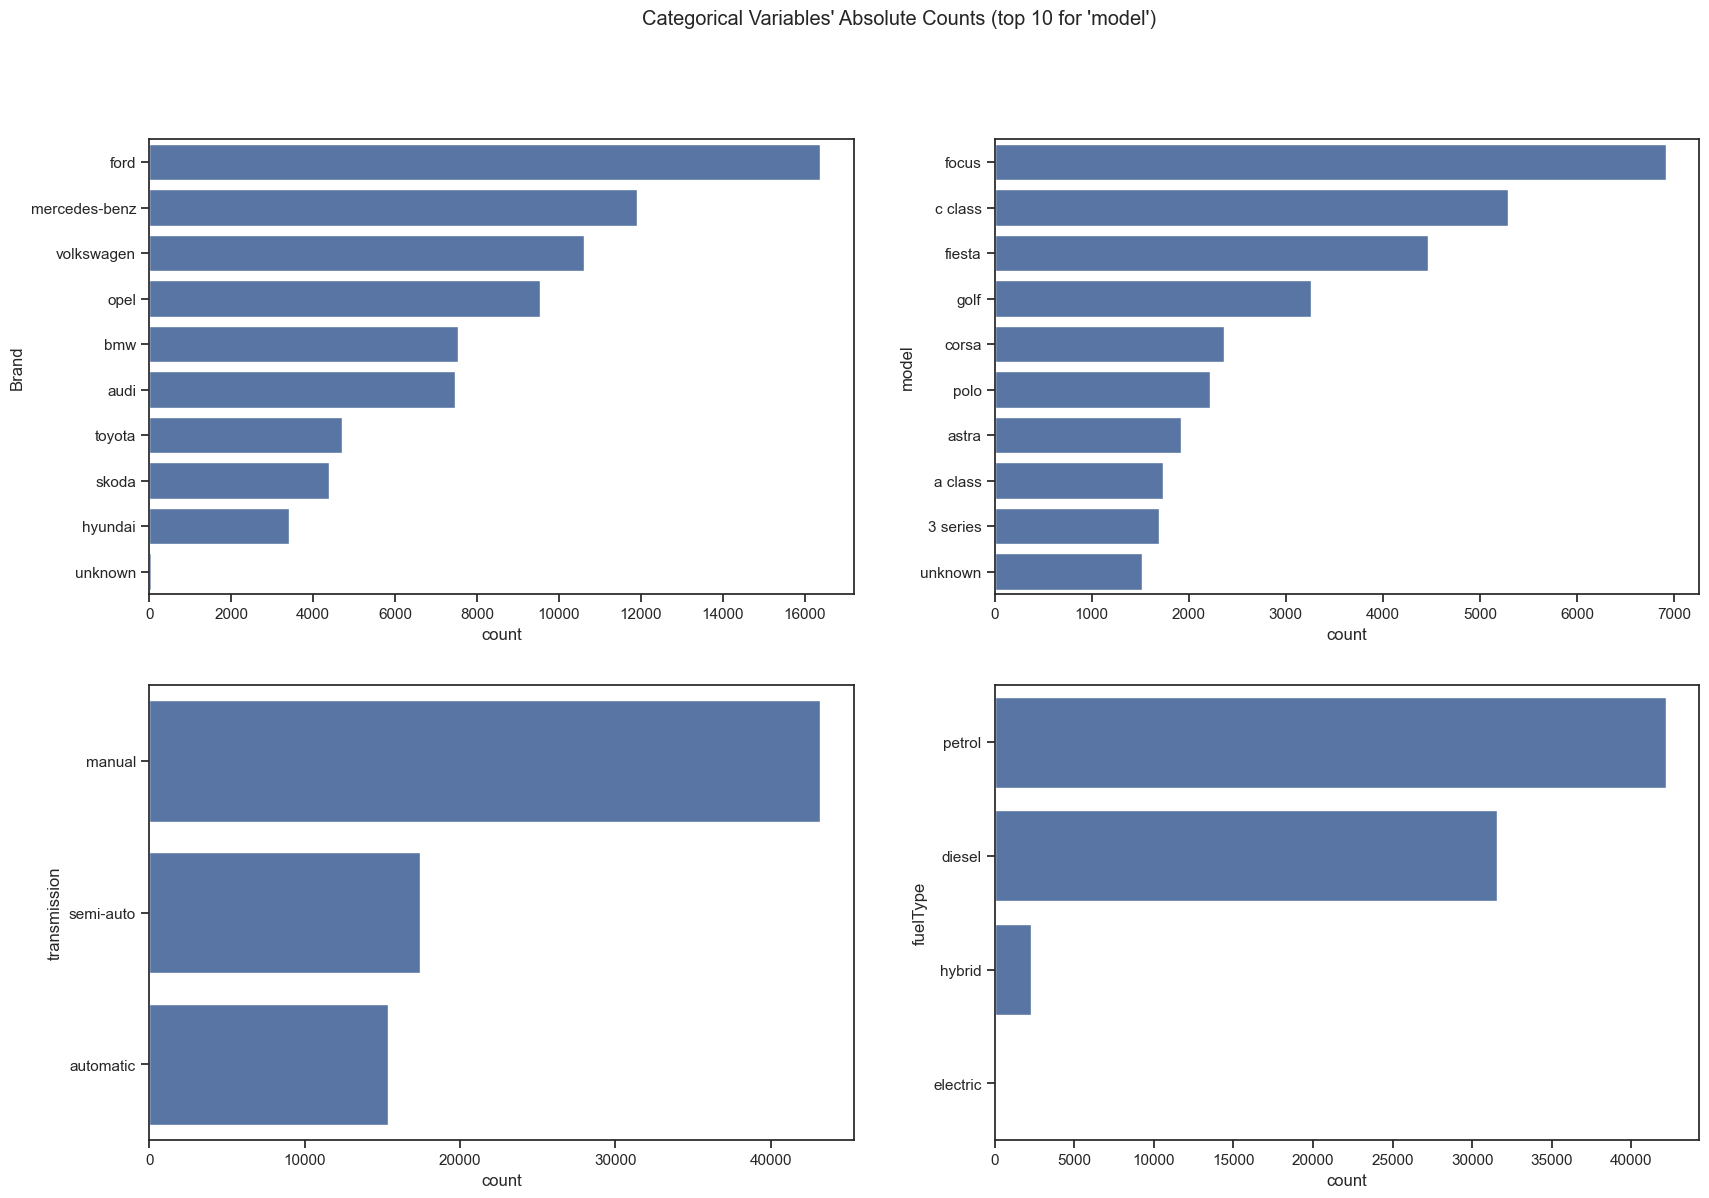

In [67]:
sns.set_style('ticks')

sp_rows = 2
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 13))

#only top 10 for model
for ax, feat in zip(axes.flatten(), non_metric_features):
    sns.countplot(y=feat, data=train, ax=ax, order=train[feat].value_counts().index[:10])

# Layout
# Add a centered title to the figure:
title = "Categorical Variables' Absolute Counts (top 10 for 'model')"

plt.suptitle(title)
plt.show()

`Brand` - Very skewed. Ford is clearly #1, followed by Mercedes-Benz, Volkswagen and Opel, then BMW and Audi.<br> 
<br>
`model` - Top models are mostly compact hatchbacks (Focus, Fiesta, Golf, Corsa, Polo, Astra), with C Class / A Class / 3 Series bringing a premium segment into the mix. Unkown being in the top 10 indicates that in the future, we may have to find a way to map those models.<br>
<br>
`tranmission` - Manual dominates, with semi-auto and automatic far behind. We are expecting that transmission will correlate with price (auto/semi-auto typically pricier).<br>
<br>
`fuelType` - Petrol > Diesel >> Hybrid >>> Electric. Alt-fuel vehicles are rare, so any model estimates for EV/Hybrid will have high uncertainty. We have the option to combine into an “alt_fuel” flag, use regularized/target encoding for fuelType, or exclude electrics if you need stable price estimates and the sample is too small.

**Numerical Histograms and Boxplots**

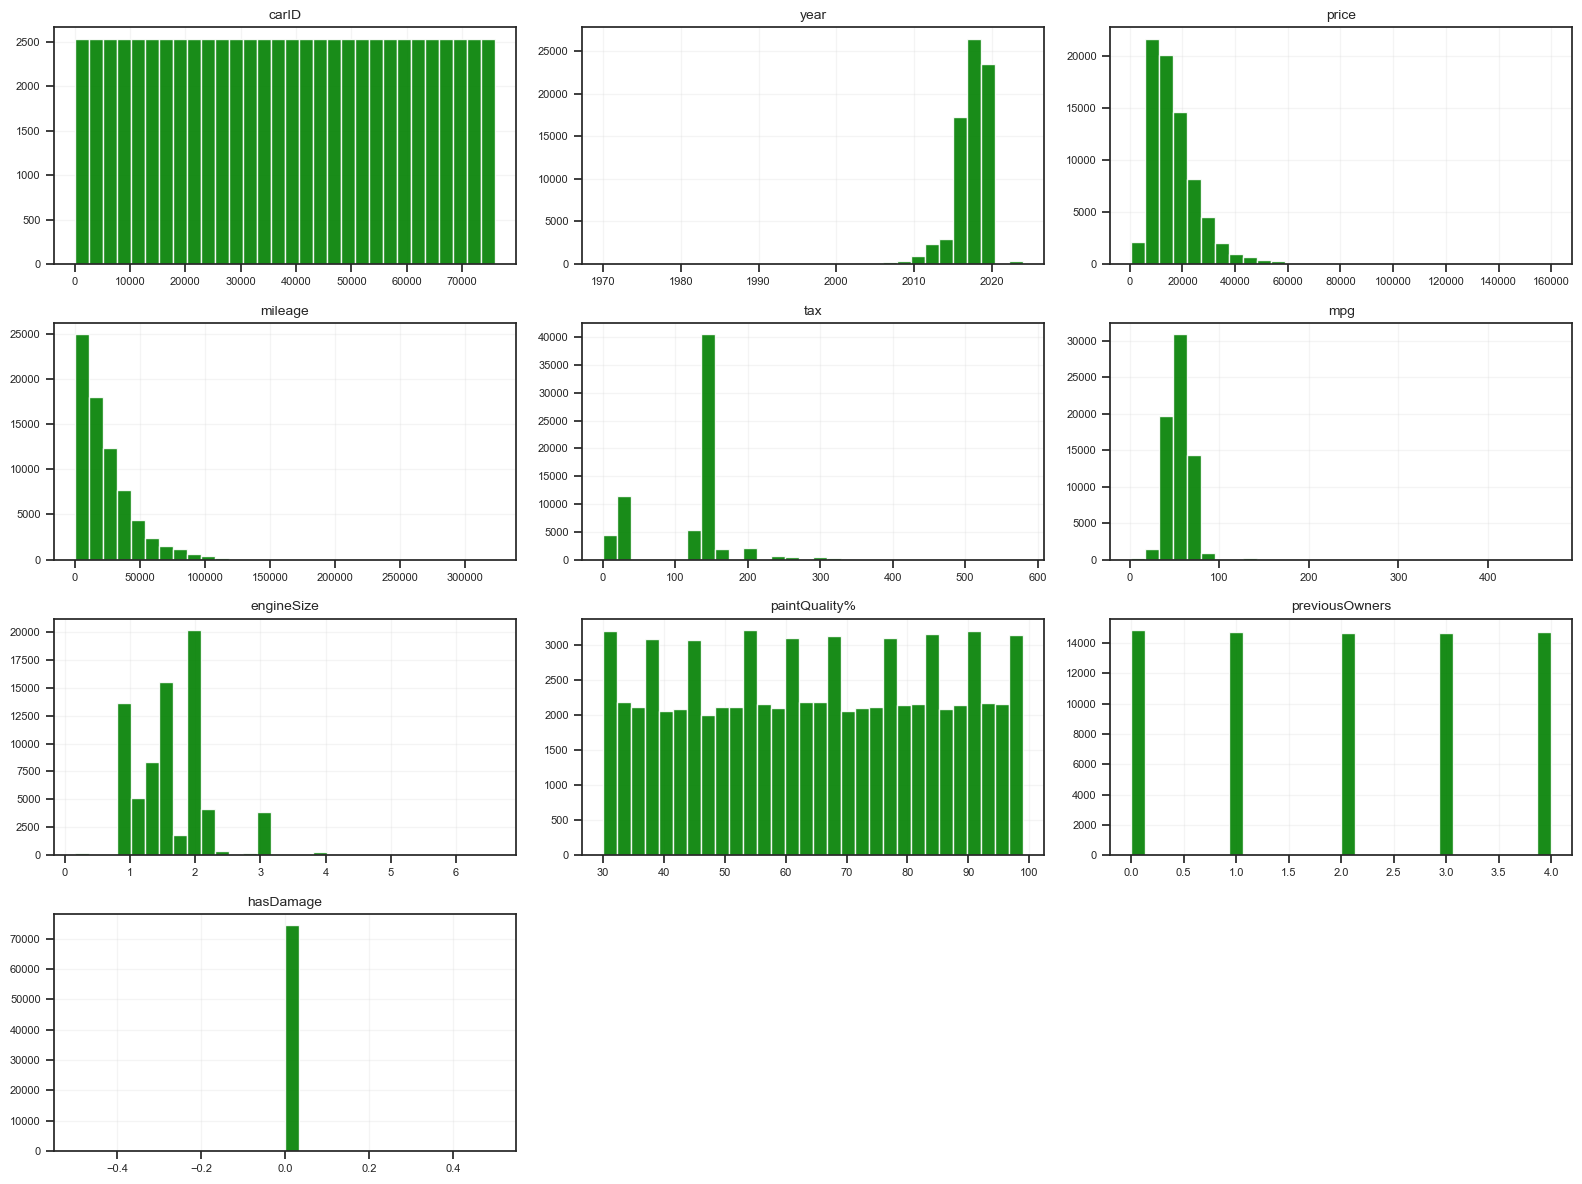

In [68]:
num = train.select_dtypes(include='number')
cols = num.columns.tolist()

n = len(cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3*nrows))
axes = axes.flatten() if n > 1 else [axes]

for ax, col in zip(axes, cols):
    ax.hist(num[col].dropna(), bins=30, color='green', edgecolor='white', alpha=0.9)
    ax.set_title(col, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.grid(alpha=0.2)

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

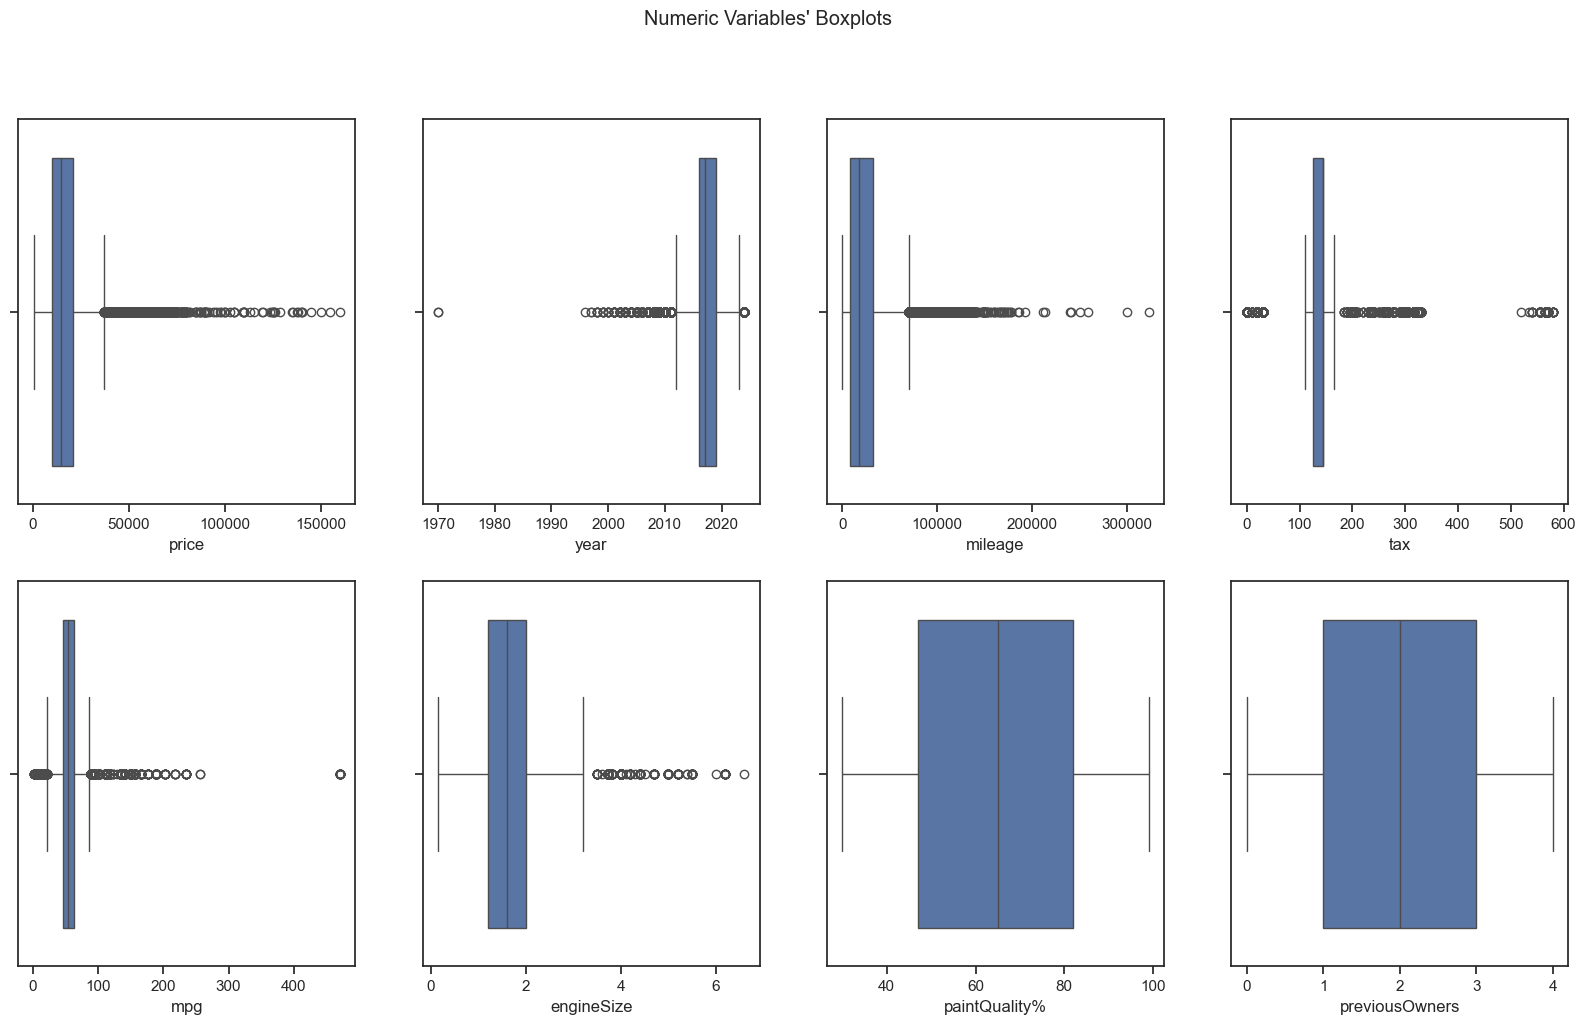

In [69]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set_style('ticks')

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Boxplots"

plt.suptitle(title)
plt.show()

Checking outliers in this short section 

In [70]:
# One outlier from 1970 - we dont have enough examples from old cars
train.loc[train['year'] < 1980]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
11425,62732,opel,zafira,1970.0,10495,manual,37357.0,petrol,200.0,42.2,NaN,60.0,2.0,0.0
34917,35769,mercedes-benz,m class,1970.0,24999,automatic,14000.0,diesel,305.0,39.2,NaN,44.0,3.0,0.0


In [71]:
# Only bmw - i3 - Whole group of cars
train.loc[train['mpg'] > 400]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
4101,13075,bmw,i3,2015.0,15498,automatic,33931.0,hybrid,0.0,470.8,NaN,31.0,4.0,0.0
5278,12640,bmw,i3,2017.0,19500,automatic,23956.0,hybrid,135.0,470.8,0.600000,53.0,1.0,0.0
6978,12786,bmw,i3,2015.0,17400,automatic,29465.0,electric,0.0,470.8,3.822758,67.0,2.0,0.0
18261,8993,bmw,i3,2016.0,18999,automatic,9990.0,hybrid,0.0,470.8,NaN,44.0,0.0,0.0
18710,12853,bmw,i3,2017.0,21898,automatic,10839.0,hybrid,0.0,470.8,NaN,31.0,4.0,0.0
21445,12090,bmw,i3,2016.0,19490,automatic,8421.0,hybrid,0.0,470.8,NaN,31.0,4.0,0.0
24975,13378,bmw,i3,2015.0,17481,automatic,9886.0,hybrid,0.0,470.8,NaN,44.0,0.0,0.0
29581,12269,bmw,i3,2017.0,19980,automatic,26965.0,hybrid,140.0,470.8,NaN,81.0,3.0,0.0
33383,10695,bmw,i3,2017.0,21494,automatic,NaN,hybrid,135.0,470.8,NaN,54.0,1.0,0.0
33829,11532,bmw,i3,2016.0,16500,automatic,35446.0,hybrid,0.0,470.8,NaN,59.0,3.0,0.0


In [72]:
#not weird
train.loc[train['mileage'] > 200000]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
4840,48382,skoda,octavia,2010.0,1190,manual,300000.0,diesel,125.0,57.6,1.9,79.0,2.0,0.0
6435,39946,mercedes-benz,a class,2016.0,16249,semi-auto,240494.0,diesel,20.0,68.9,2.1,81.0,4.0,0.0
6658,4692,audi,a6,2008.0,2490,manual,323000.0,diesel,200.0,44.1,2.0,74.0,1.0,0.0
33429,9978,bmw,x5,2012.0,7250,automatic,214000.0,diesel,300.0,37.7,3.0,68.0,1.0,0.0
33484,48912,skoda,octavia,NaN,2750,automatic,241565.0,diesel,185.0,47.9,1.9,33.0,4.0,0.0
41953,74387,volkswagen,caravelle,2012.0,11995,automatic,212000.0,diesel,325.0,34.4,2.0,42.0,2.0,0.0
45843,48042,skoda,octavia,2010.0,1485,manual,250650.0,diesel,125.0,57.6,1.9,62.0,1.0,0.0
55413,45370,mercedes-benz,v class,2010.0,6949,automatic,259000.0,diesel,540.0,30.7,3.0,54.0,1.0,0.0


In [73]:
# seems fine
train.loc[train['tax'] > 400].sample(9)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
14623,8641,bmw,x5,2016.0,41211,semi-auto,46180.0,petrol,570.0,NaN,4.4,91.0,1.0,0.0
43564,2280,audi,rs4,2015.0,29995,semi-auto,35905.0,petrol,565.0,9.821462,4.2,93.0,4.0,0.0
30303,9423,bmw,3 series,2007.0,8750,automatic,79000.0,petrol,565.0,28.500000,3.0,49.0,1.0,0.0
62692,72112,volkswagen,golf,2008.0,7995,manual,99906.0,petrol,570.0,26.200000,3.2,60.0,1.0,0.0
74824,44623,mercedes-benz,m class,2011.0,10990,automatic,69000.0,diesel,555.0,32.500000,3.0,69.0,3.0,0.0
29745,45503,mercedes-benz,gl class,2007.0,7340,automatic,104000.0,diesel,570.0,28.800000,3.0,92.0,2.0,0.0
66991,36,audi,rs5,2014.0,26995,automatic,49989.0,petrol,555.0,26.400000,4.2,99.0,3.0,0.0
15228,6950,audi,a4,2006.0,7995,automatic,74000.0,petrol,570.0,22.800000,4.2,36.0,4.0,0.0
4784,13600,bmw,6 series,2006.0,4999,automatic,126054.0,petrol,555.0,29.700000,3.0,80.0,2.0,0.0


In [74]:
#seems fine
train.loc[train['tax'] < 100].sample(9)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
59948,48613,skoda,octavia,2015.0,7495,manual,48000.0,petrol,30.0,57.7,1.2,37.0,4.0,0.0
48005,48376,skoda,octavia,2016.0,10295,manual,37078.0,diesel,0.0,74.3,1.6,66.0,1.0,0.0
28264,31080,ford,mondeo,2017.0,10295,manual,71480.0,diesel,30.0,64.2,2.0,95.0,0.0,0.0
64686,29612,ford,fiesta,2016.0,8998,manual,36488.0,petrol,20.0,62.8,1.0,40.0,4.0,0.0
38514,14356,bmw,1 series,2016.0,11350,manual,44000.0,diesel,20.0,72.4,1.5,64.0,3.0,0.0
9208,9920,bmw,5 series,2015.0,12900,automatic,82000.0,diesel,30.0,62.8,2.0,56.0,1.0,0.0
1909,70535,volkswagen,golf,2016.0,13390,manual,19273.0,petrol,30.0,53.3,1.4,81.0,2.0,0.0
36205,14022,bmw,5 series,2016.0,10990,manual,85635.0,diesel,30.0,65.7,2.0,96.0,0.0,0.0
65446,15203,ford,b-max,2013.0,5995,manual,42996.0,diesel,20.0,70.6,1.6,99.0,2.0,0.0


In [75]:
#seems fine
train.loc[train['engineSize'] > 4].sample(9)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
3647,45815,mercedes-benz,clk,2002.0,3790,automatic,98000.0,petrol,325.000000,24.6,5.0,67.0,0.0,NaN
56241,21830,ford,mustang,2017.0,29980,automatic,24000.0,petrol,150.000000,23.5,5.0,39.0,4.0,0.0
41101,40094,mercedes-benz,c class,2013.0,22948,automatic,39000.0,petrol,NaN,NaN,6.2,89.0,1.0,0.0
38761,44412,mercedes-benz,sl class,2019.0,79210,automatic,10.0,petrol,145.000000,28.0,5.5,89.0,4.0,0.0
14623,8641,bmw,x5,2016.0,41211,semi-auto,46180.0,petrol,570.000000,NaN,4.4,91.0,1.0,0.0
50617,2769,audi,s4,2004.0,6990,automatic,88024.0,petrol,325.000000,22.4,4.2,51.0,0.0,0.0
31195,40506,mercedes-benz,s class,2015.0,36499,automatic,8051.0,petrol,326.028233,31.7,4.7,60.0,1.0,NaN
60460,28949,ford,mustang,2019.0,40495,automatic,2000.0,petrol,145.000000,22.1,5.0,58.0,2.0,0.0
51353,16805,ford,mustang,2017.0,28000,semi-auto,8470.0,petrol,570.000000,23.5,5.0,56.0,1.0,0.0


`year` - Skewed, massively concentrated between 2014 and 2020. We will create avariable "*carAge*" = ref_year - year because age is easier to model. Narrow span means age will be a strong driver. Near 1970 outlier.<br>
<br>
`price`(**Target variable**) - Heavy right-skew with a long tail. In the future try to apply log<br>
<br>
`mileage` - Also right-skewed (long tail). In the future try to apply log1p(mileage). Check mileage/age to flag anomalies (very low or very high use per year).<br>
<br>
`mpg` - Tight around ~40–70 mpg with few extremes.<br>
<br>
`engineSize` - consider bins rather than a plain linear term.<br>
<br>
`paintQuality%` - Looks nearly unniform, maybe subjective.<br>
<br>
`previousOwners` - Looks nearly uniform, check for correlation with price (probably more owners less the price)<br>

### 2.2.2 Bivariate Analysis

<h5>Numerical - Numerical<h5>

**Corelations Heatmap**<br>
<br>
We use Spearman’s ρ because several variables are skewed/heavy-tailed. Spearman is rank-based, more robust to outliers, captures monotonic (not necessarily linear) relations, and is invariant to monotonic transforms

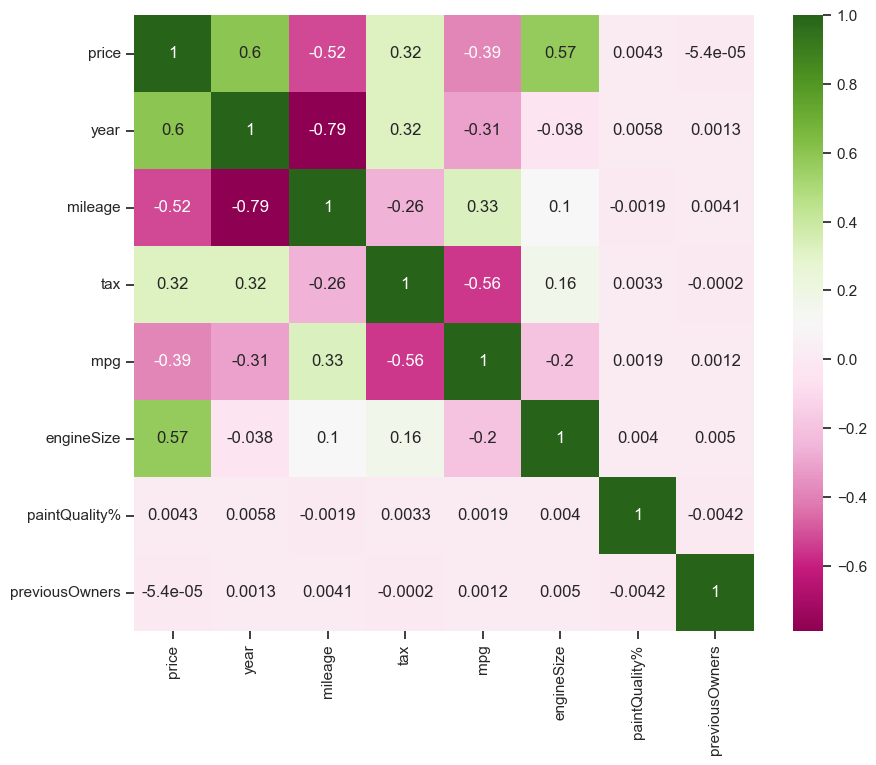

In [76]:
fig = plt.figure(figsize=(10, 8))
threshold = 0.3

corr = train[metric_features].corr(method="spearman")

annot = corr.round(2).astype(str)
annot_masked = annot.where(corr.abs() >= threshold, '') 

sns.heatmap(data=corr,annot= True, cmap = 'PiYG')

plt.show()

- Strongest rank links with price: year (ρ≈+0.60), engineSize (ρ≈+0.57), and lower mileage (ρ≈−0.52) → newer, bigger-engine, lower-mileage cars rank higher in price.<br>
<br>
- Tax/Efficiency signal: tax vs mpg (ρ≈−0.56).<br>
<br>
- High collinearity to manage: year vs mileage (ρ≈−0.79).<br>
<br>
- Near-zero signals: paintQuality% and previousOwners show ~0 correlation with price/others<br>


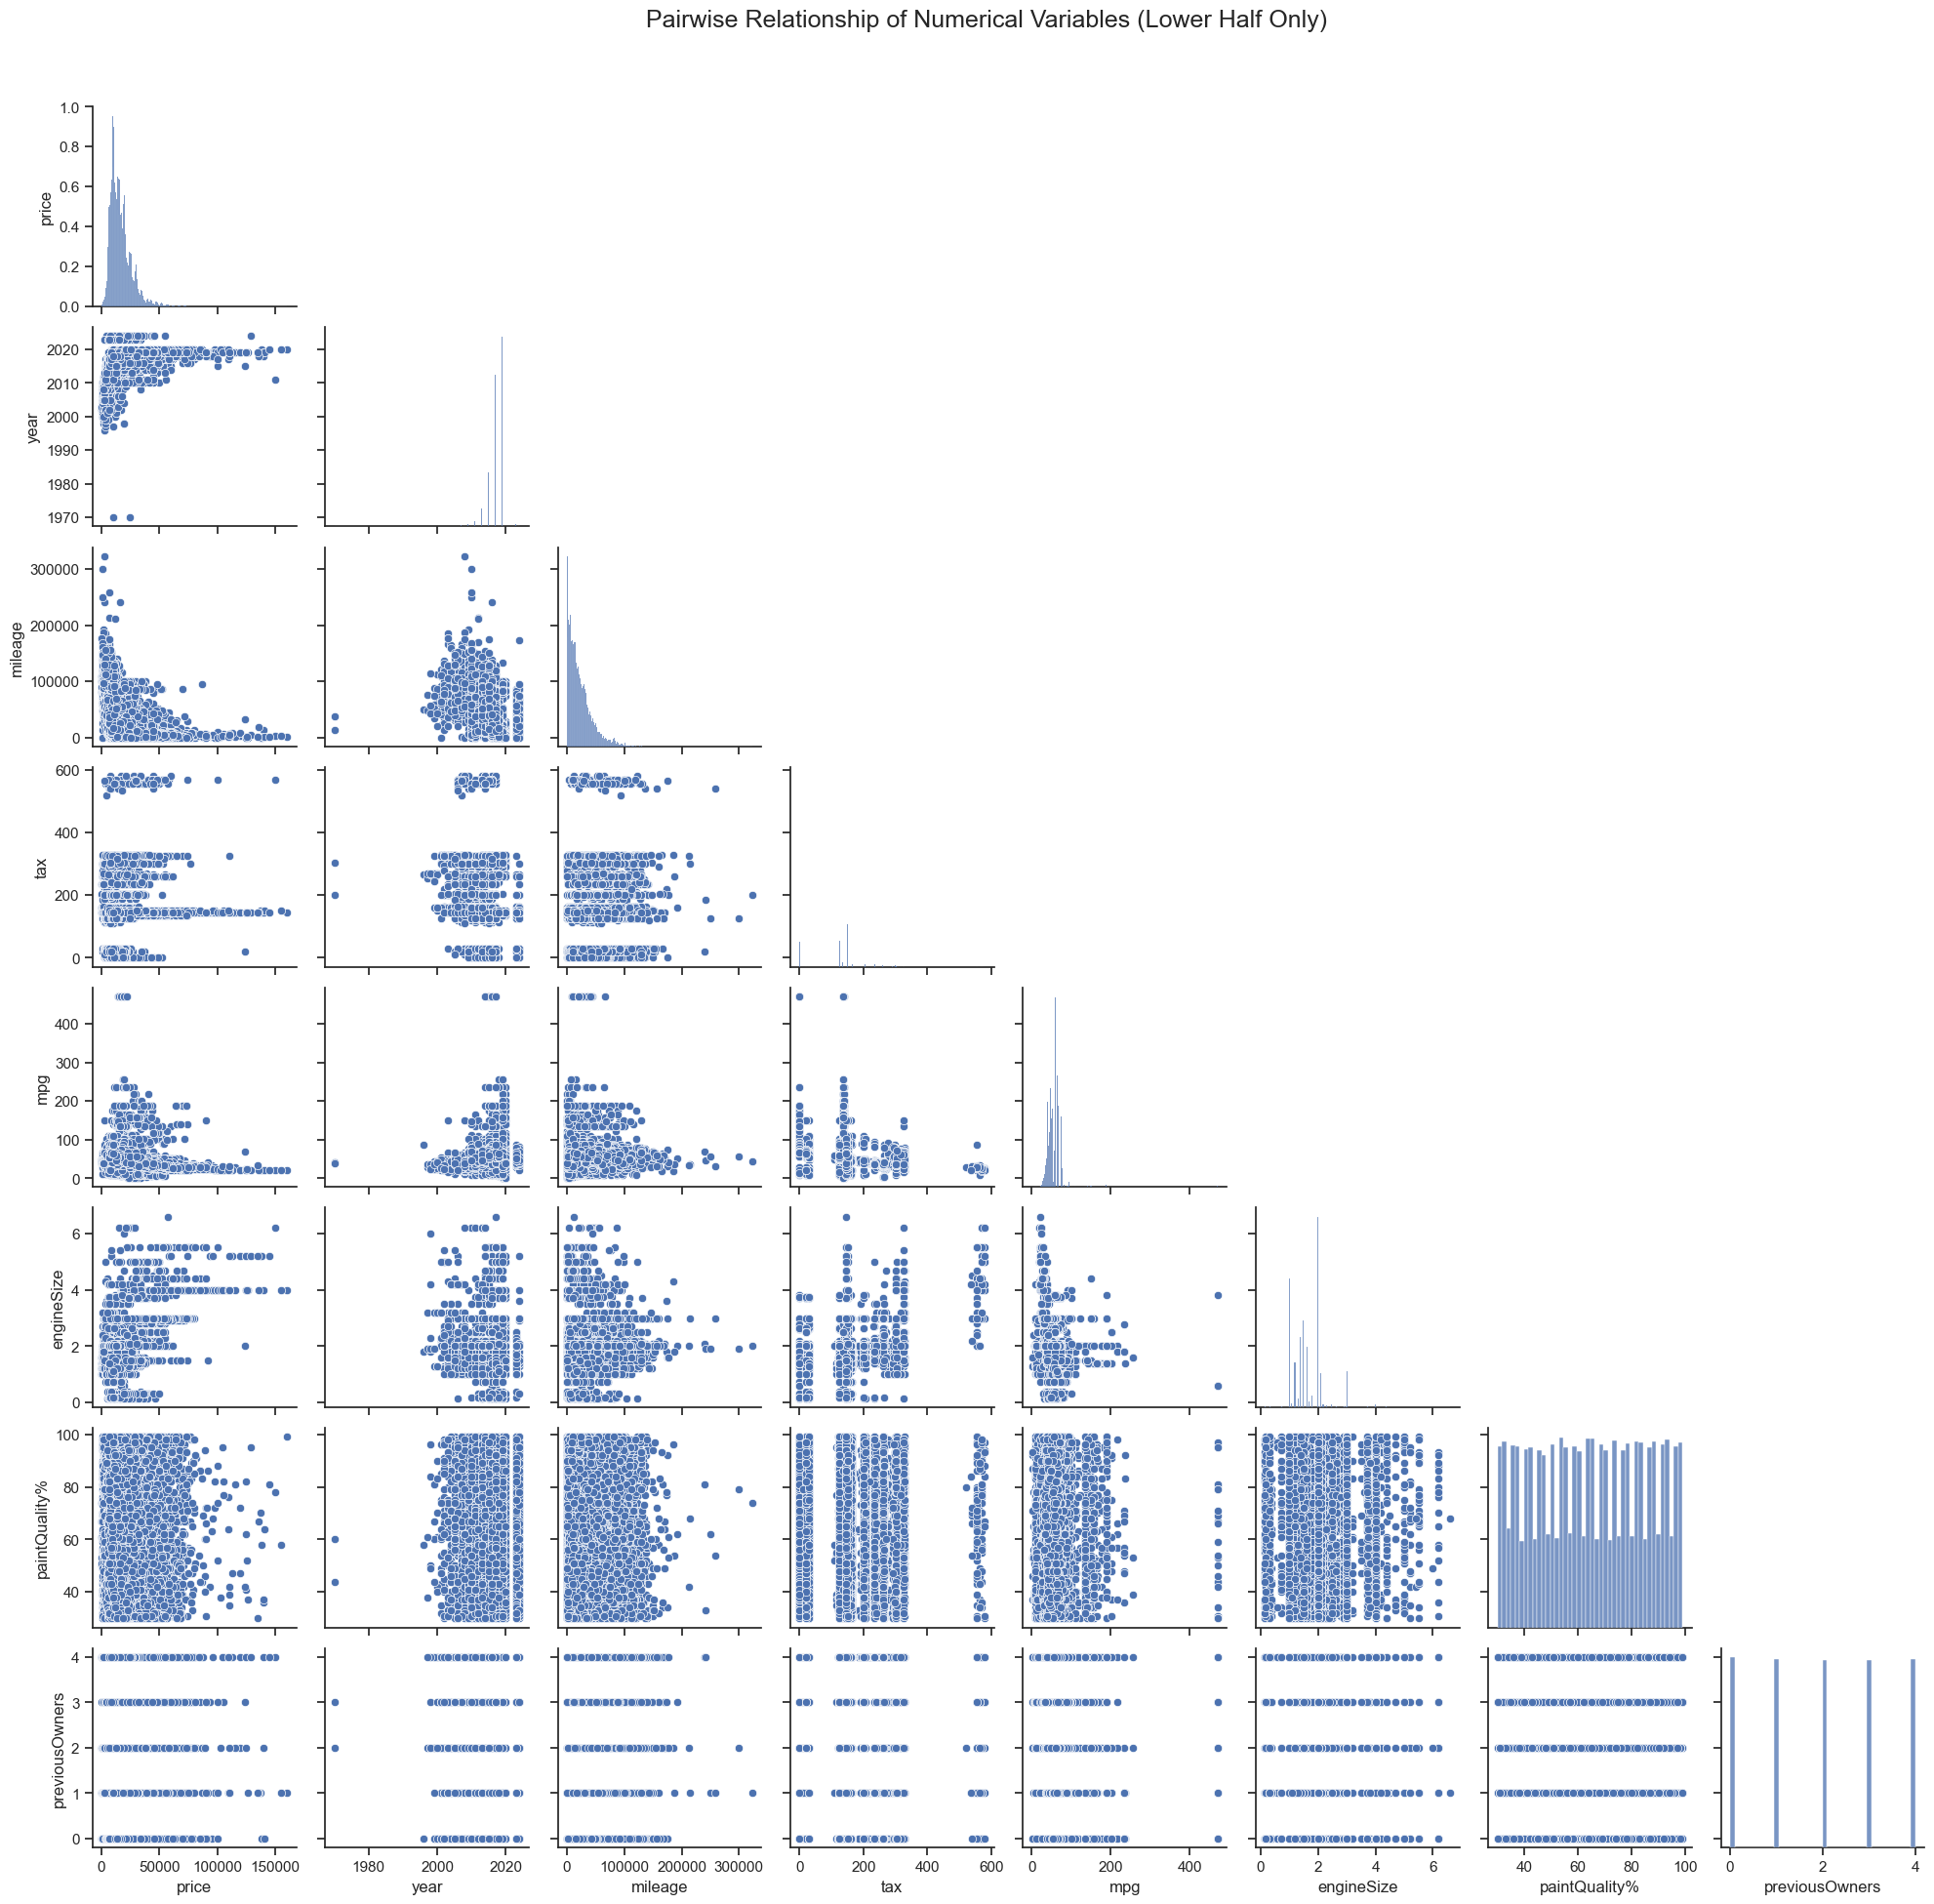

In [77]:
sns.set_style("ticks")

num_cols = len(metric_features)

g = sns.PairGrid(train[metric_features], diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=False)

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

plt.subplots_adjust(top=0.93)
g.fig.suptitle("Pairwise Relationship of Numerical Variables (Lower Half Only)", fontsize=18)

plt.show()

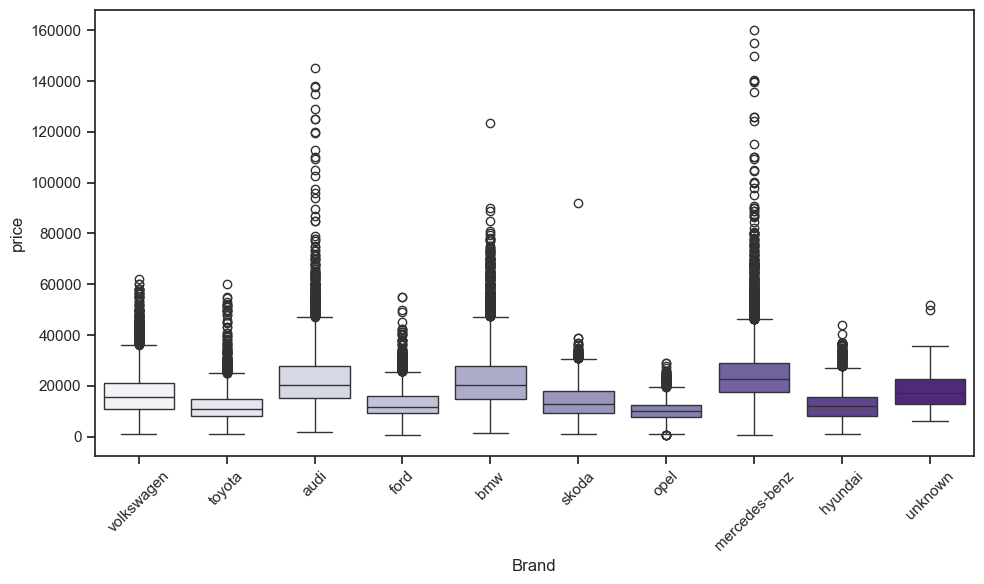

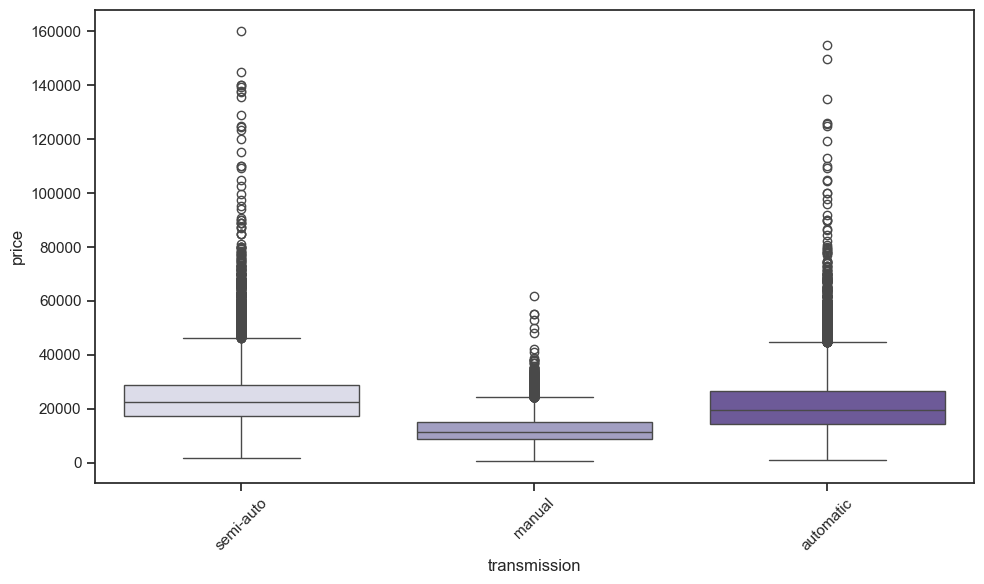

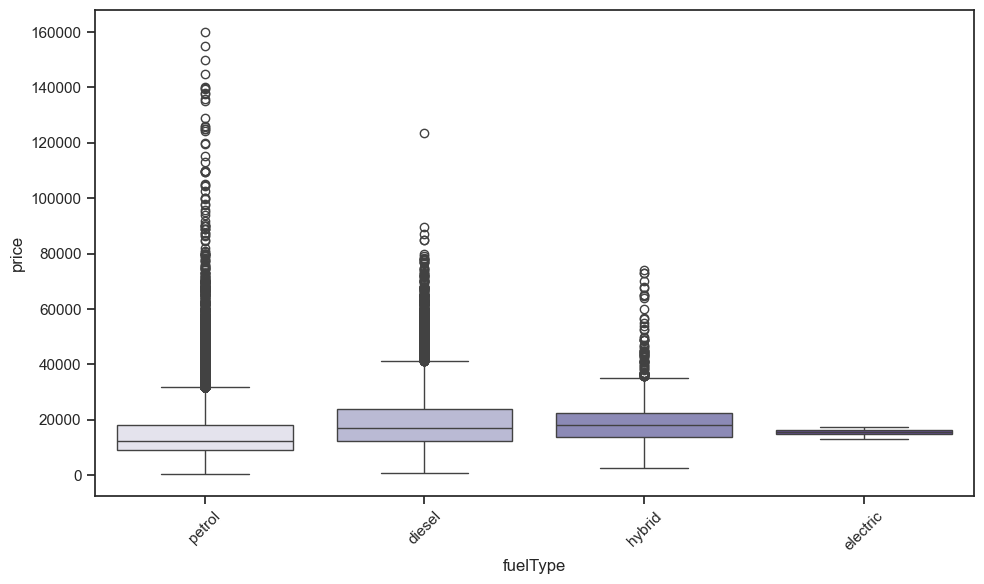

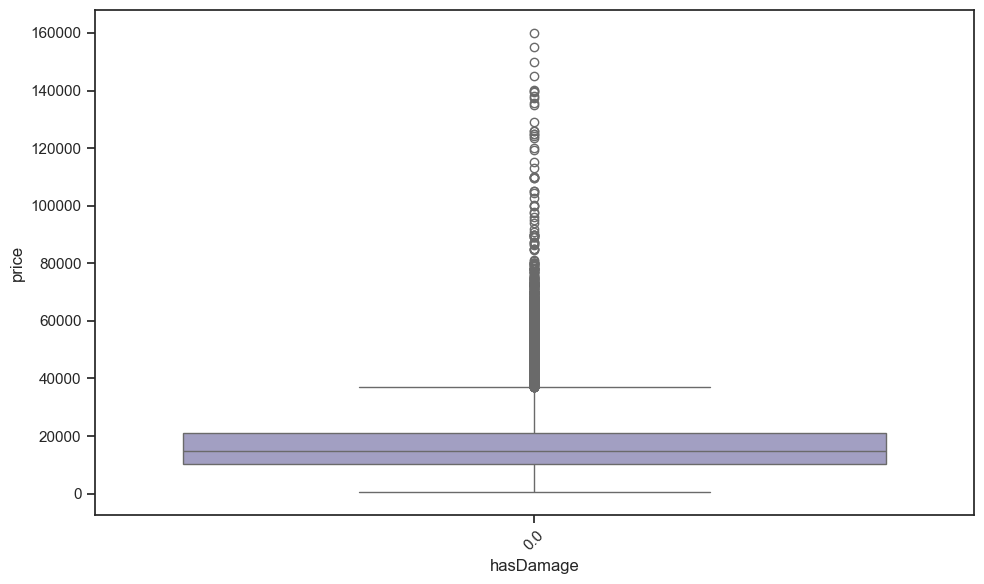

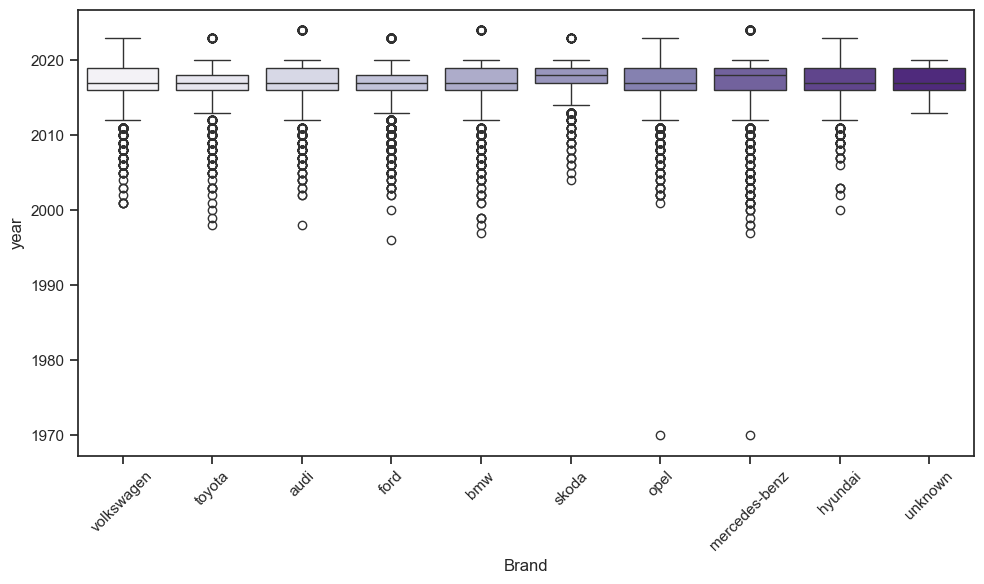

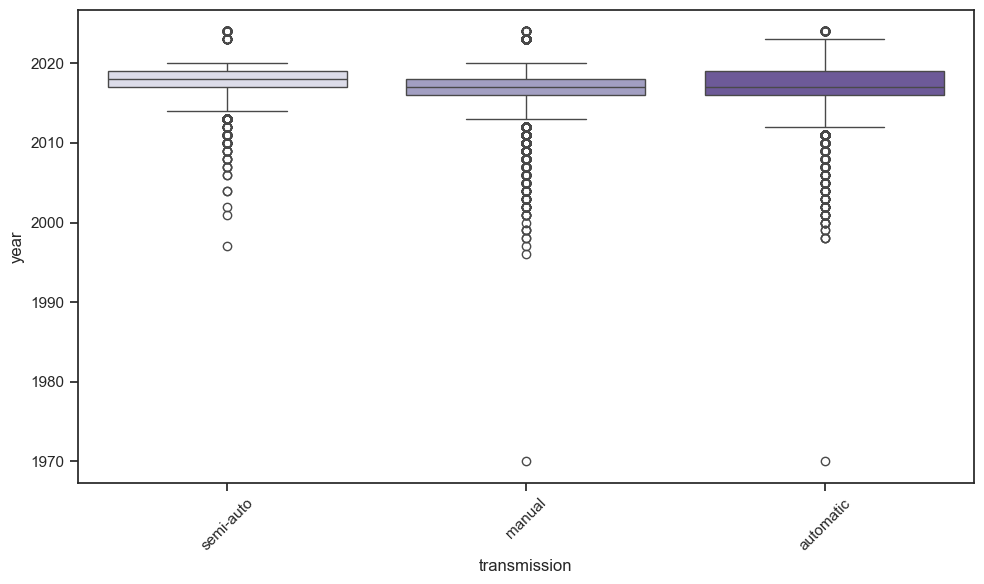

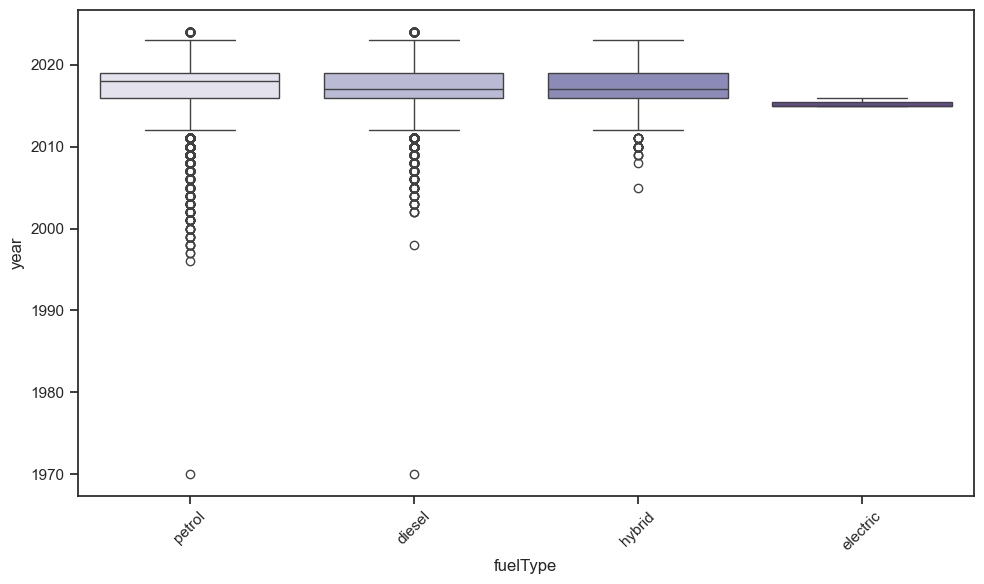

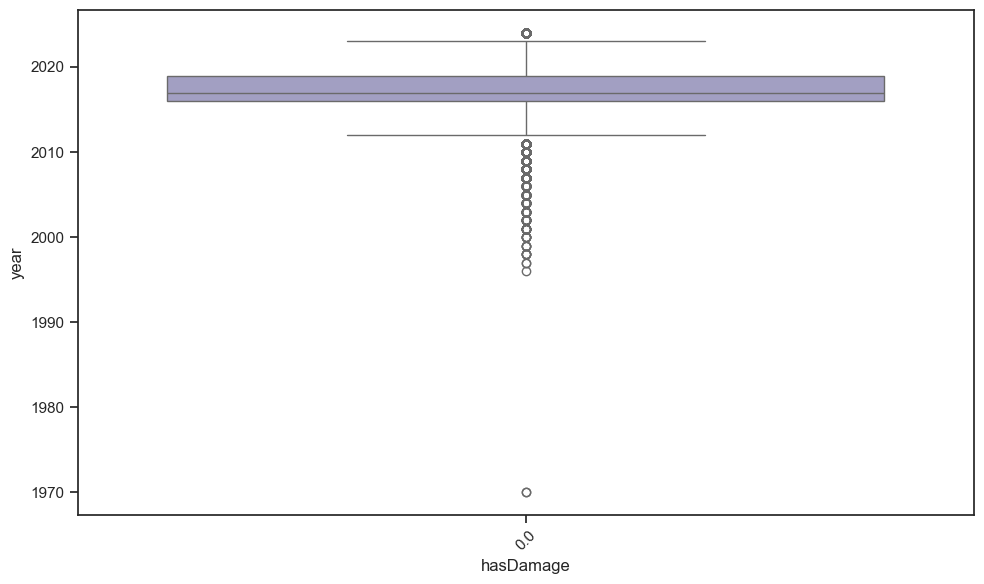

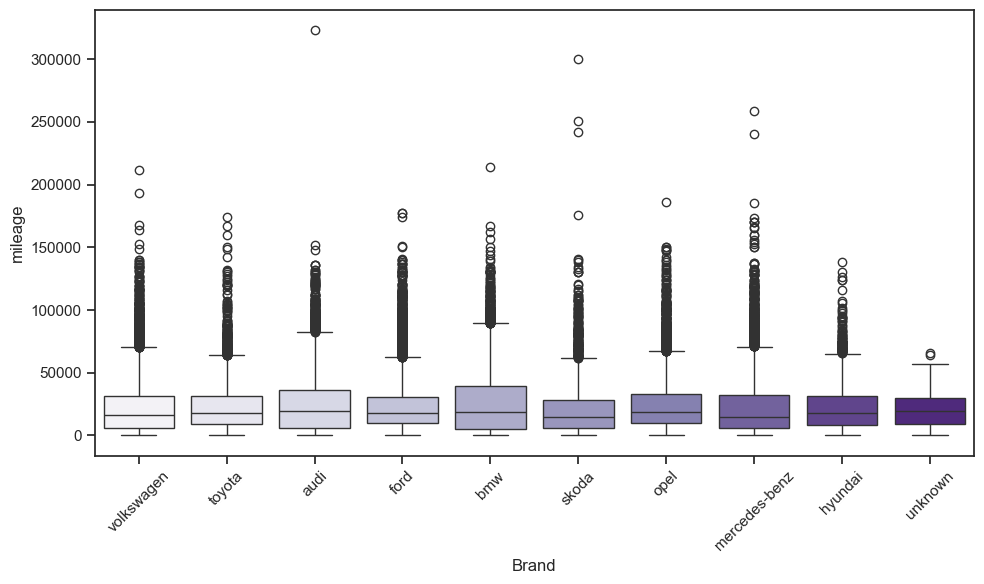

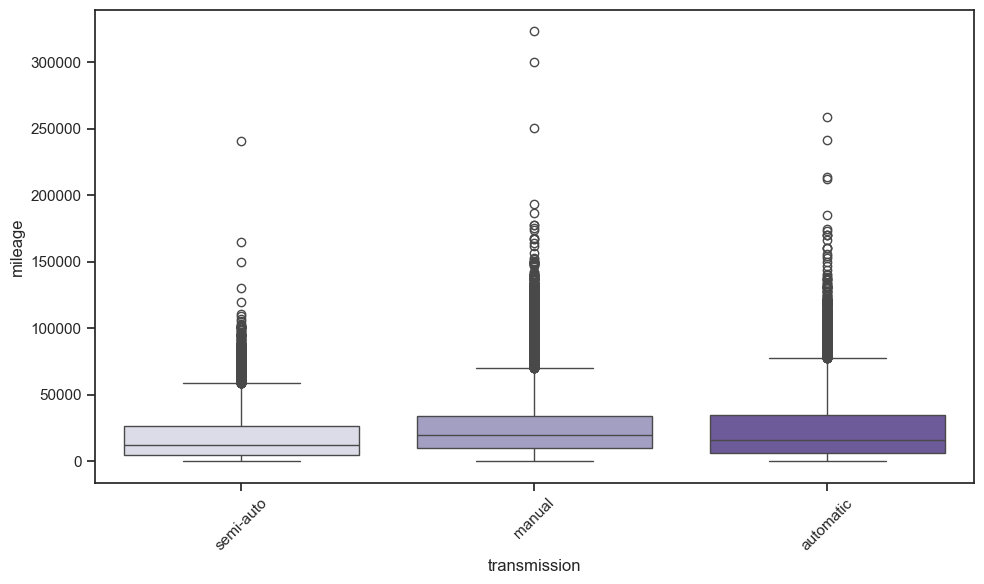

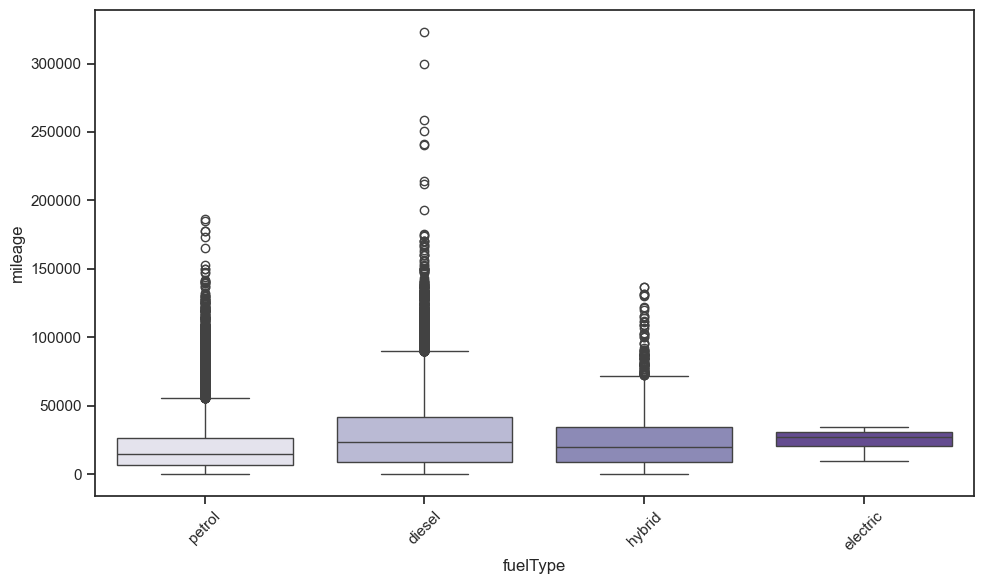

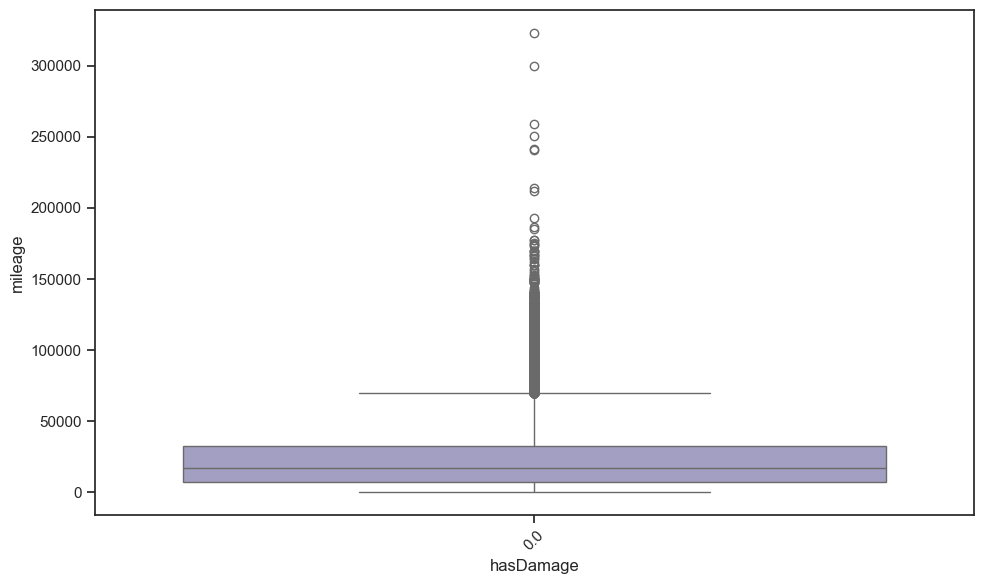

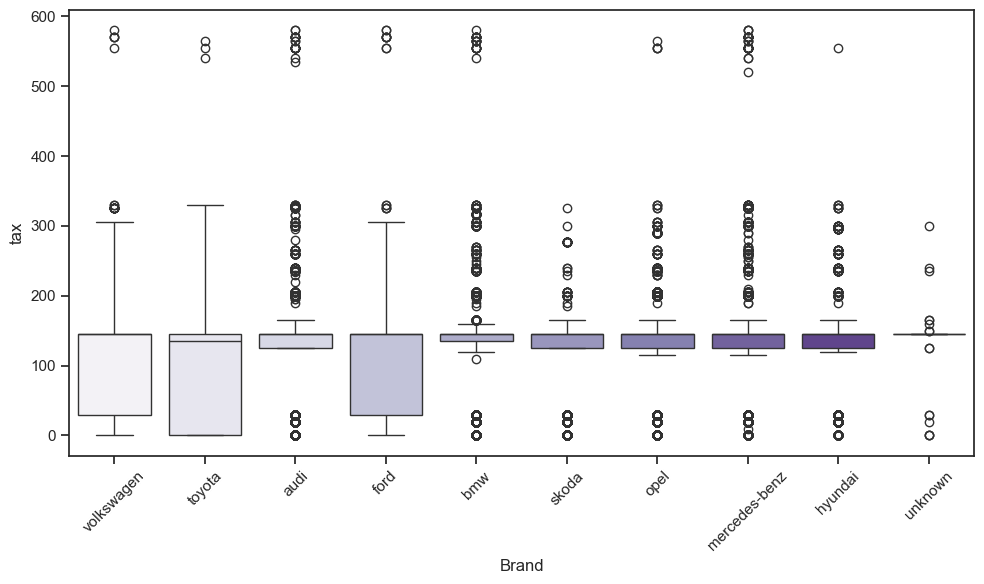

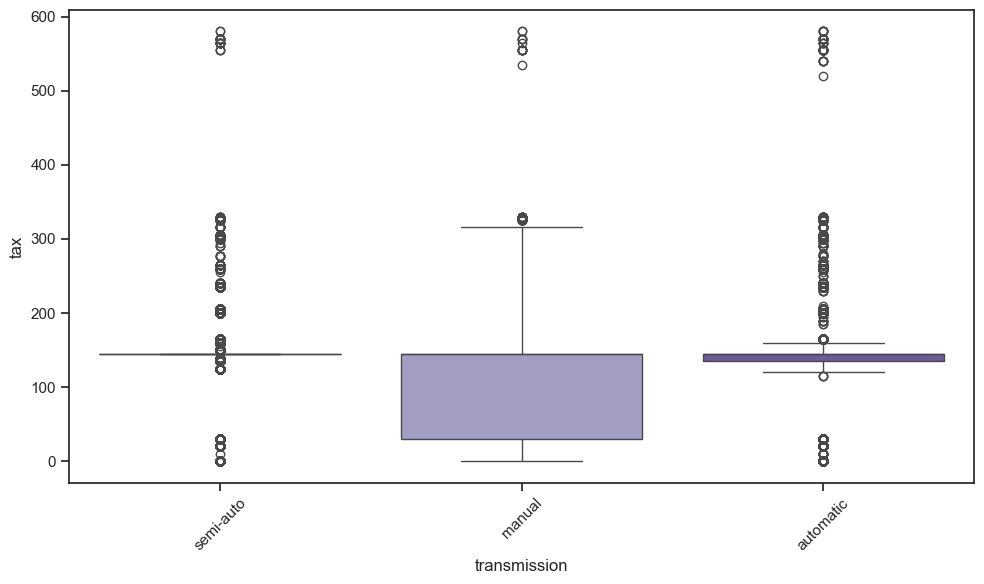

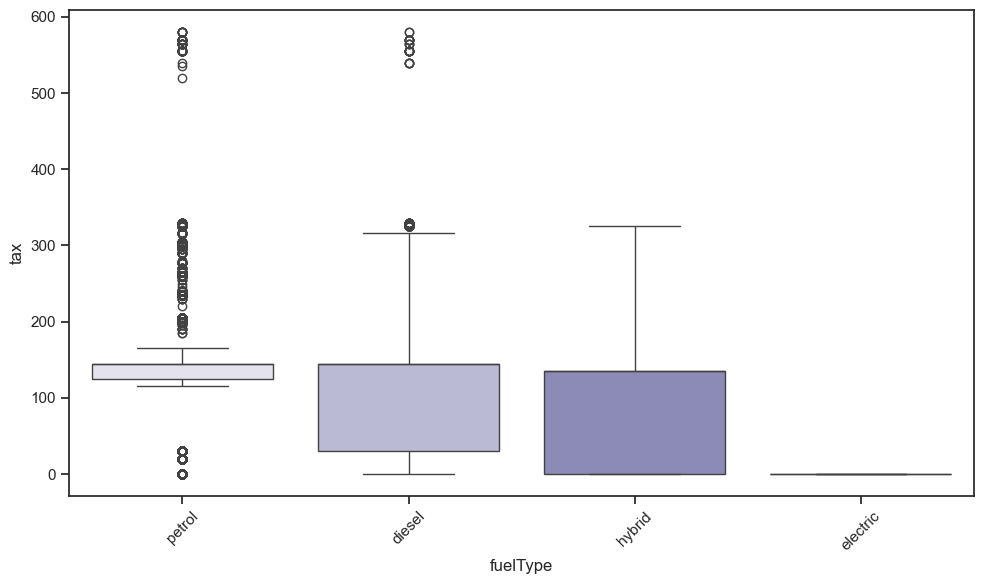

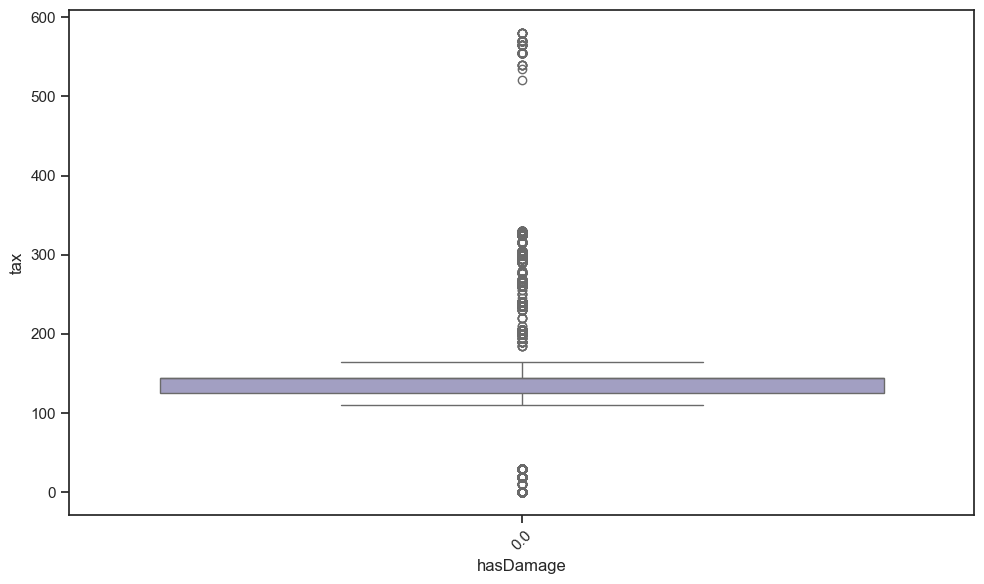

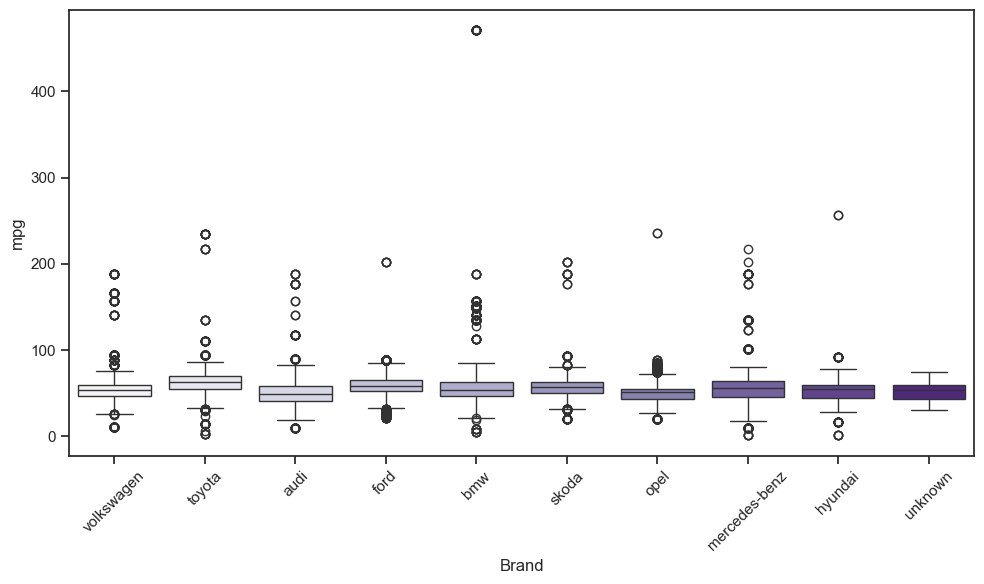

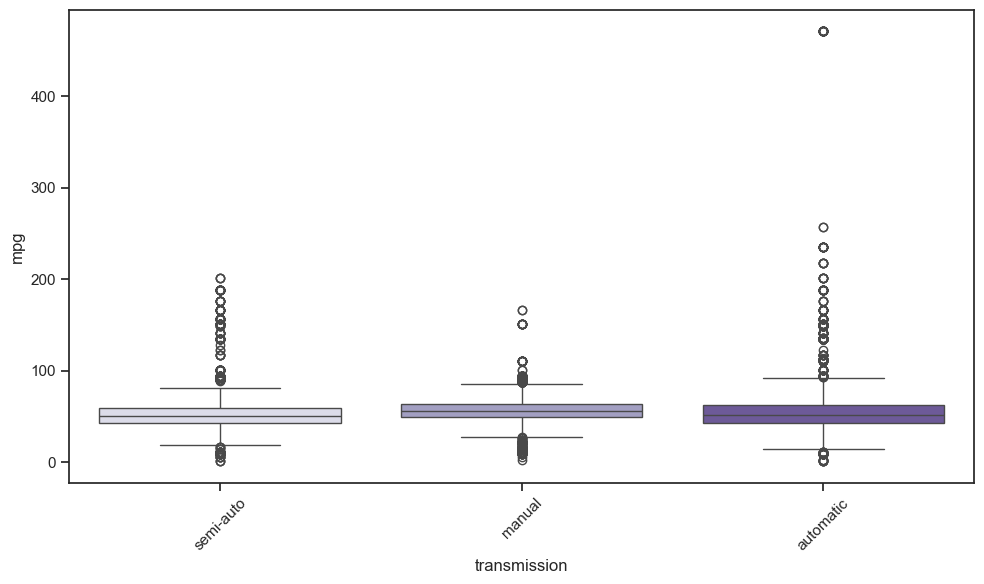

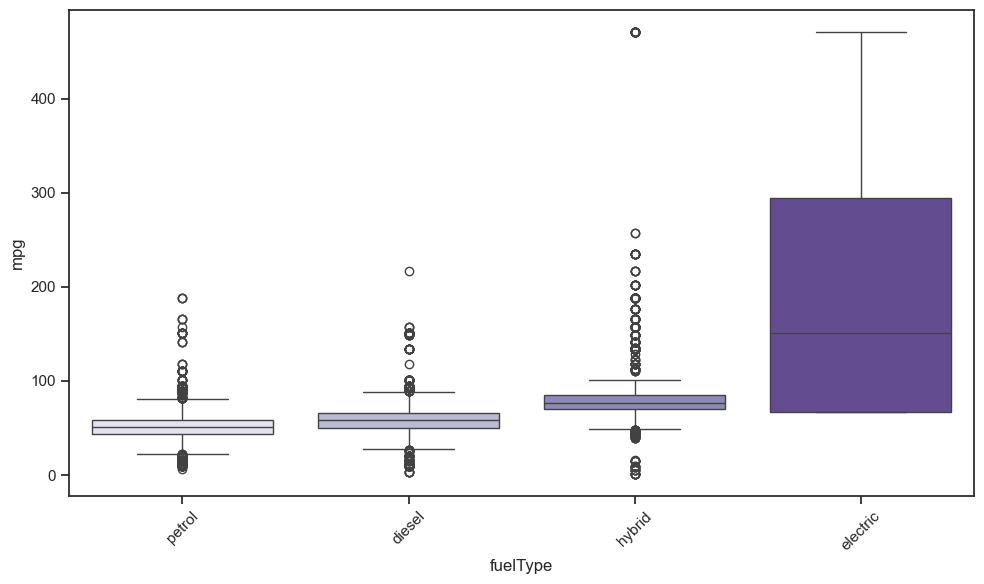

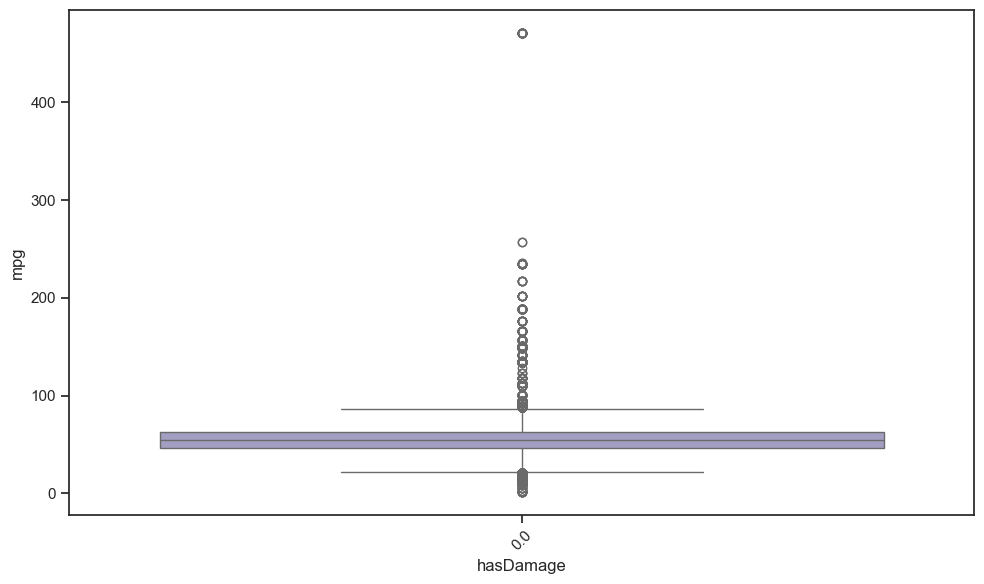

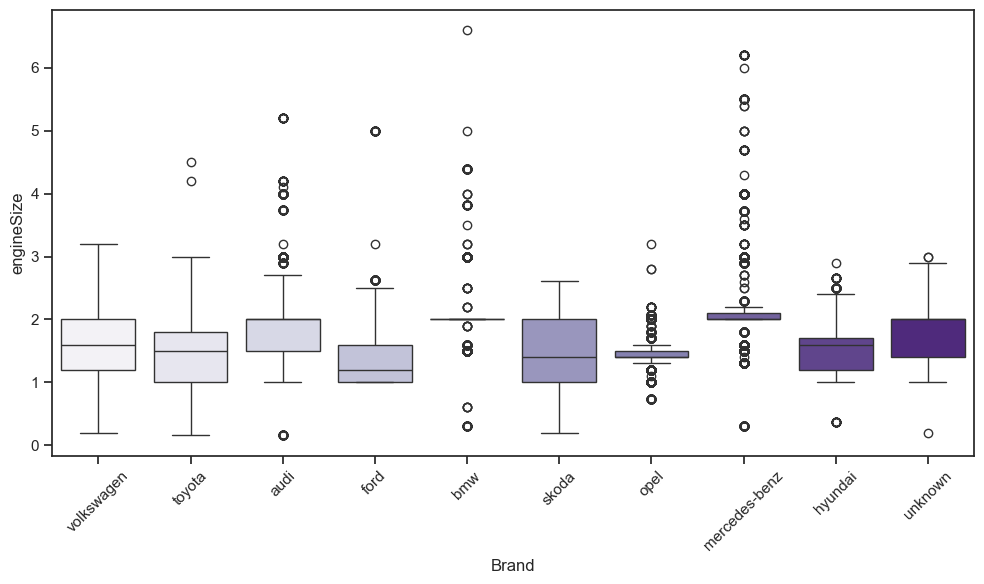

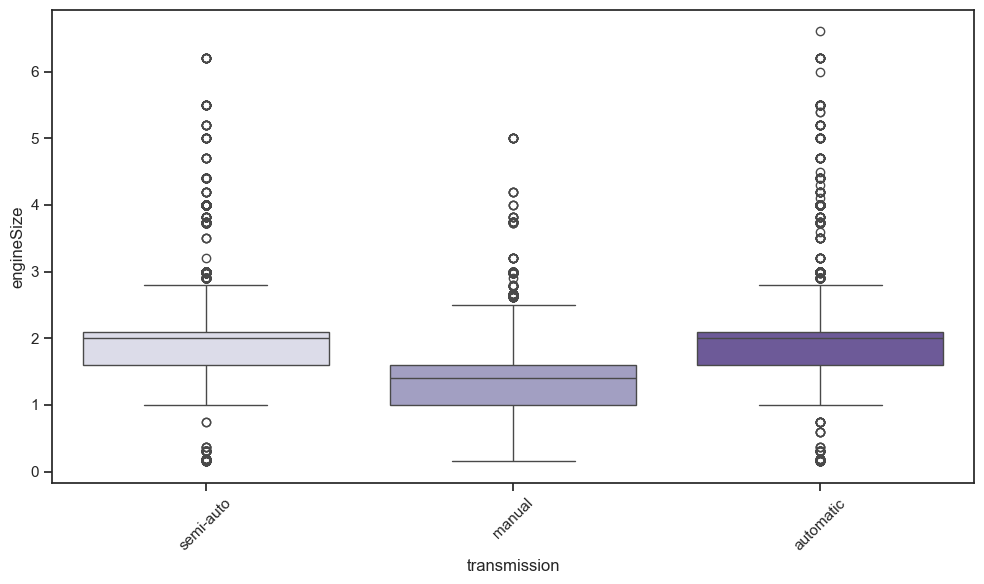

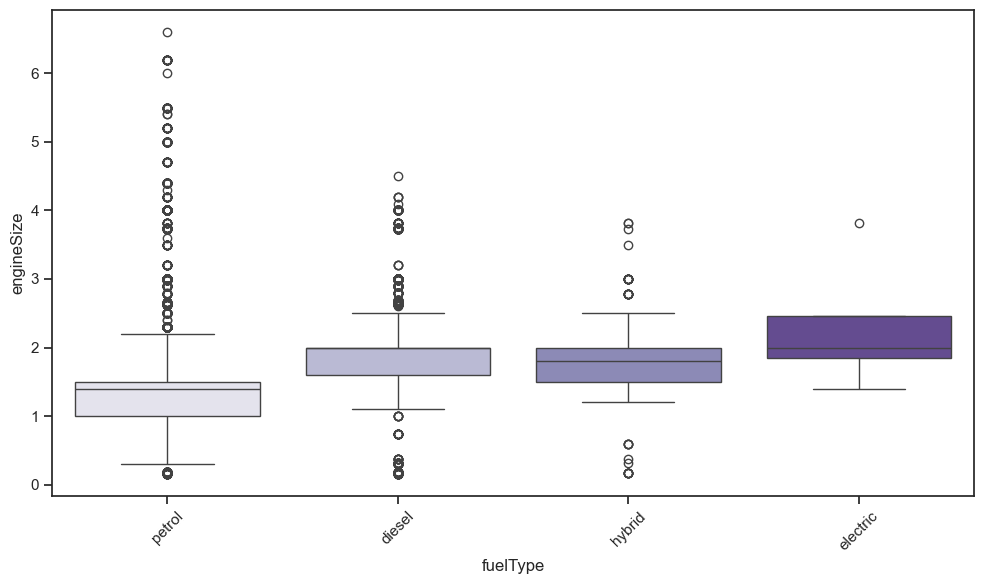

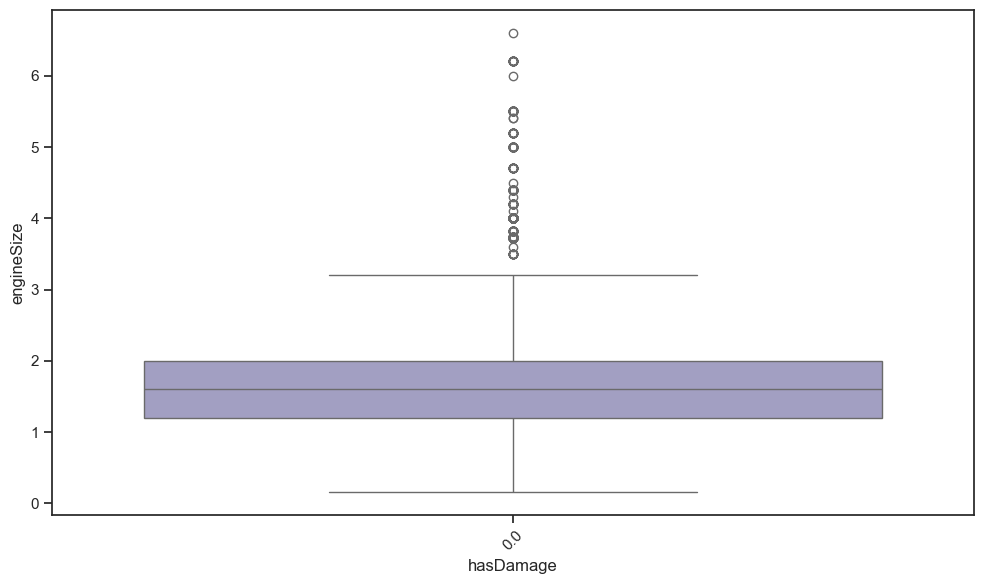

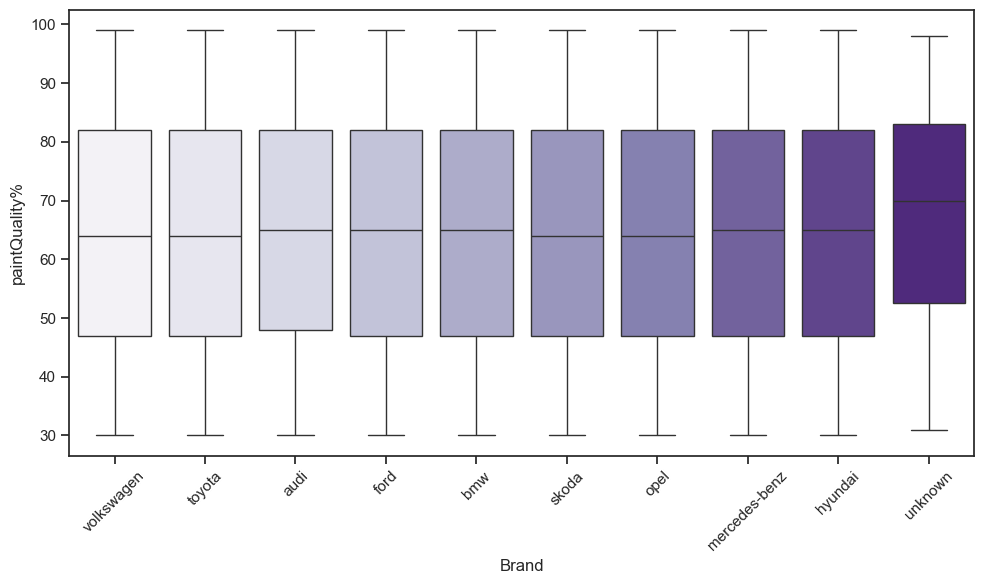

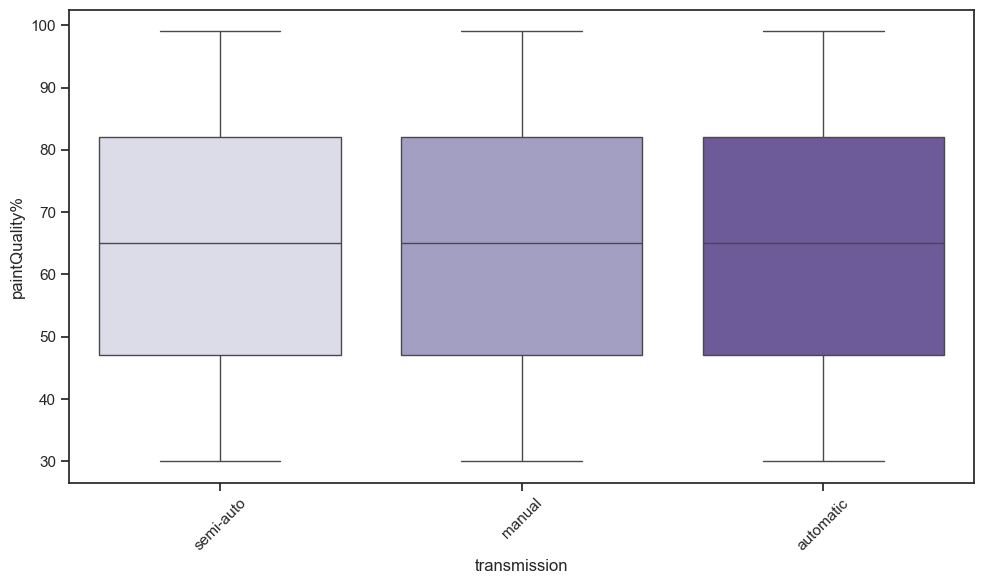

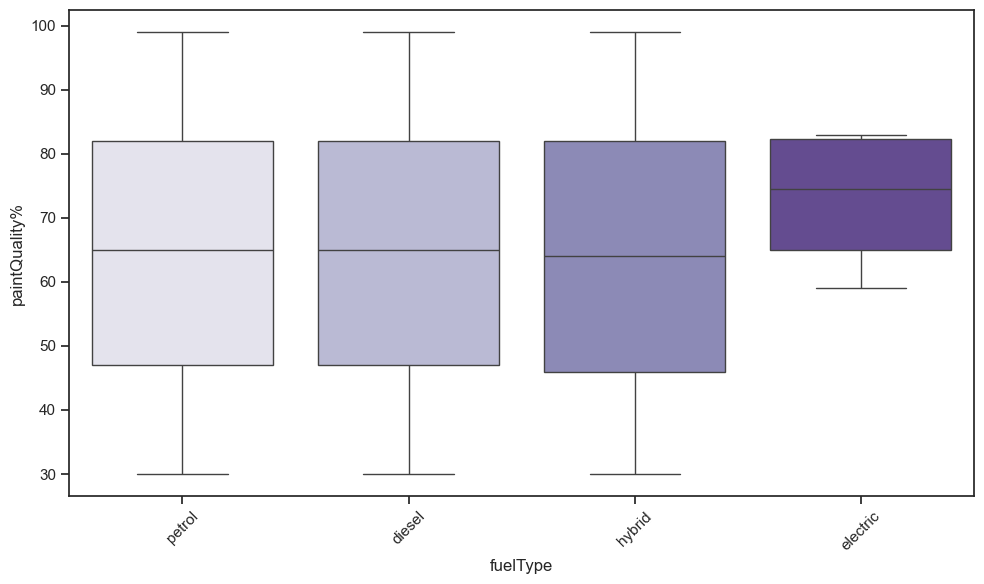

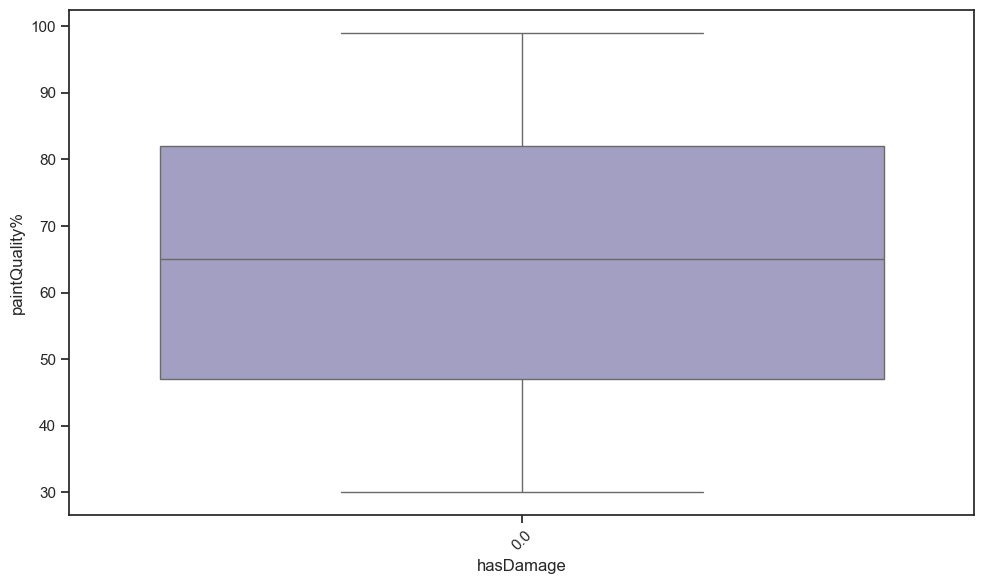

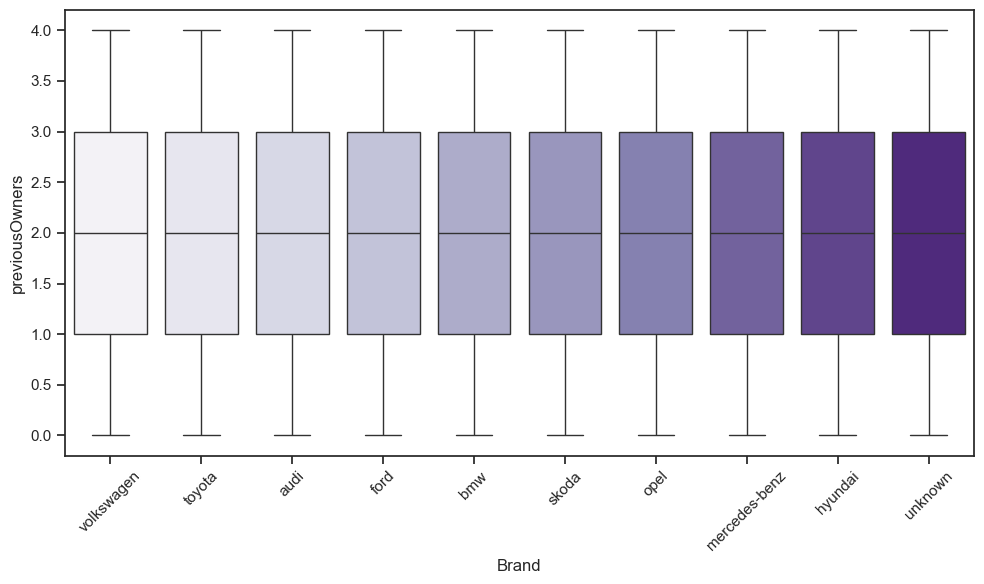

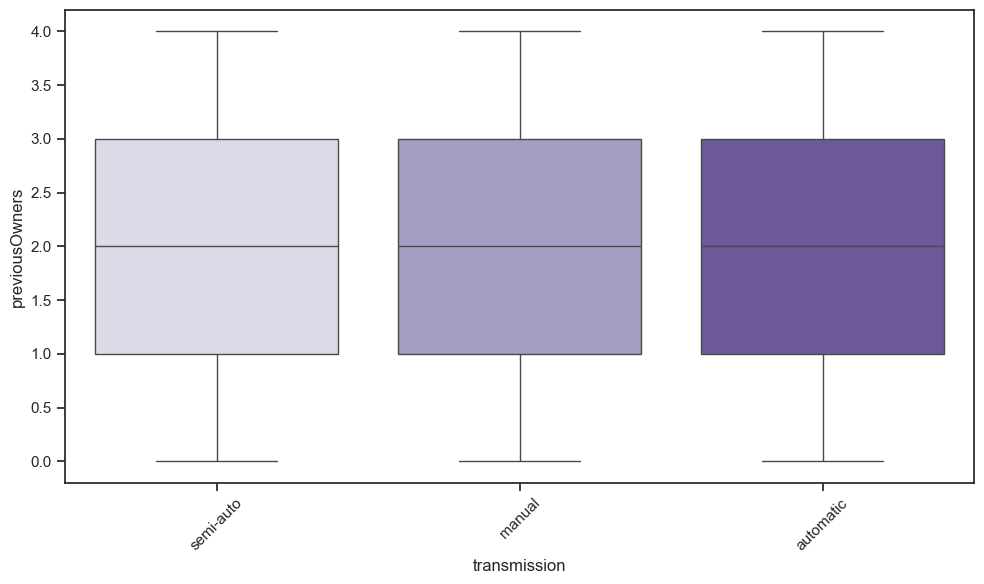

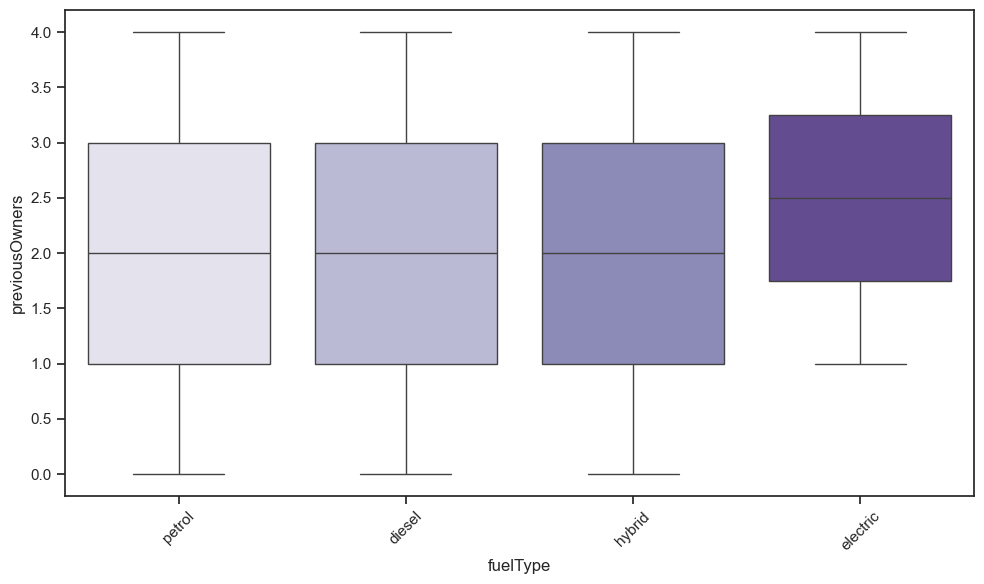

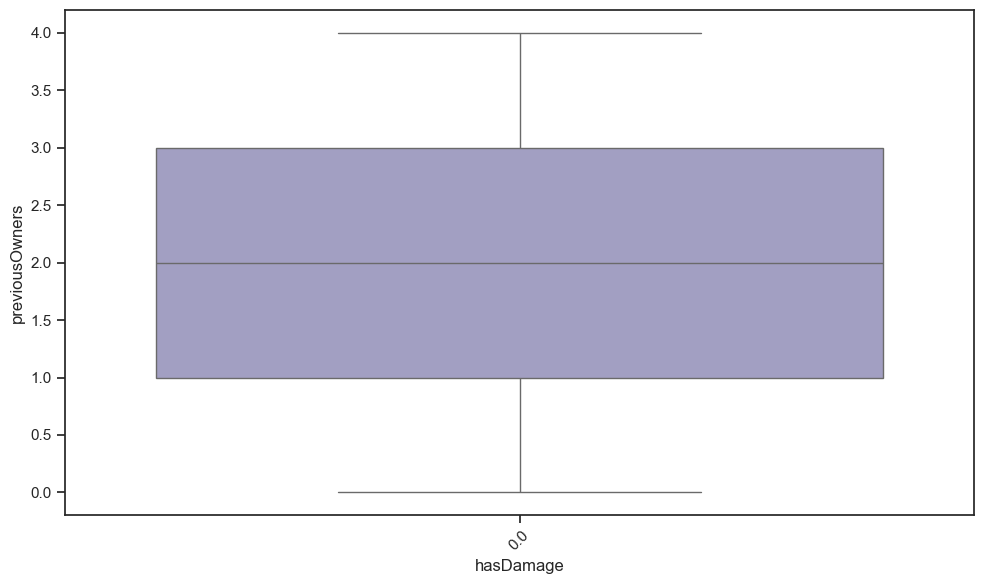

In [78]:
for column in metric_features:
    for x in [f for f in non_metric_features if f != 'model']:
        comparative_boxplot(train, x, column)


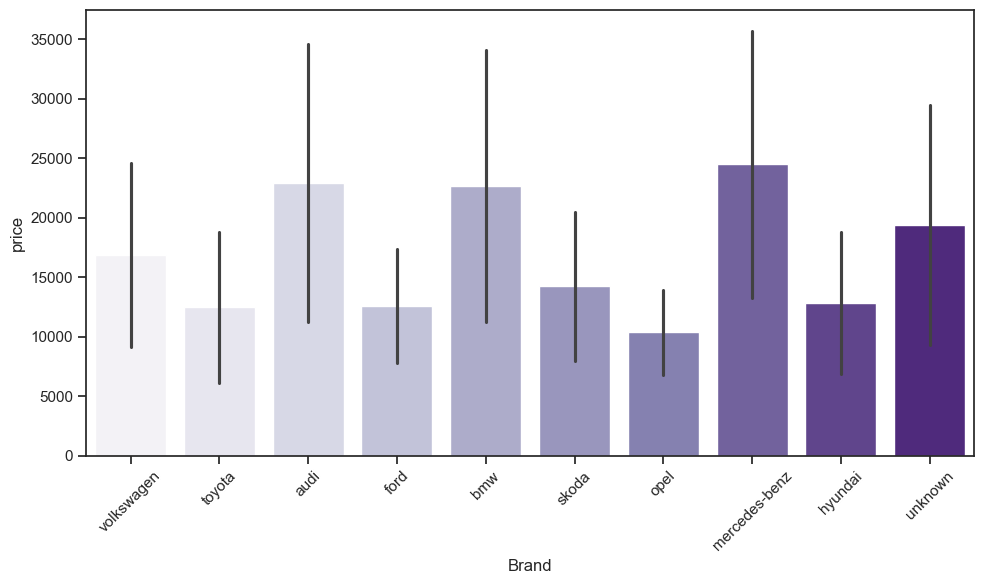

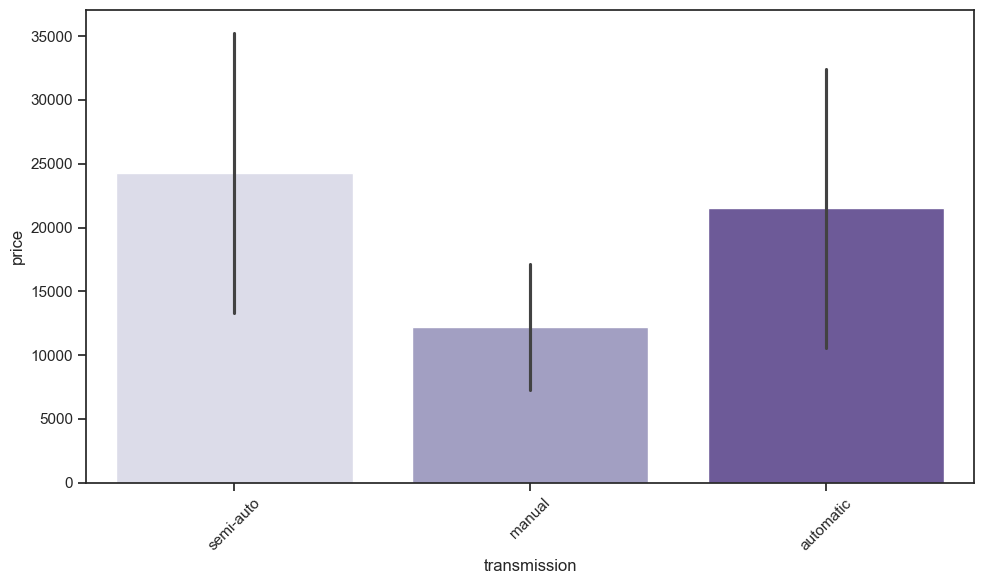

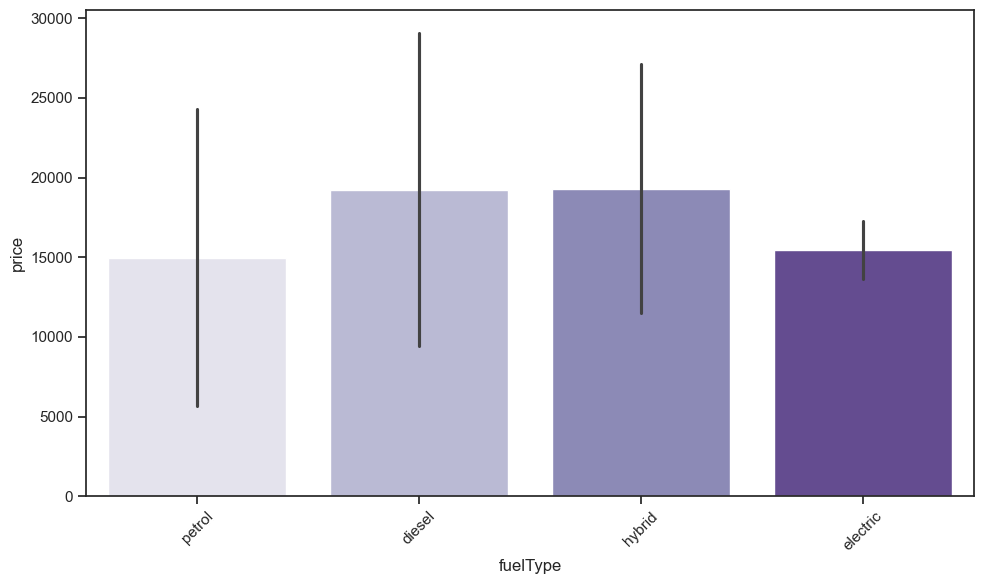

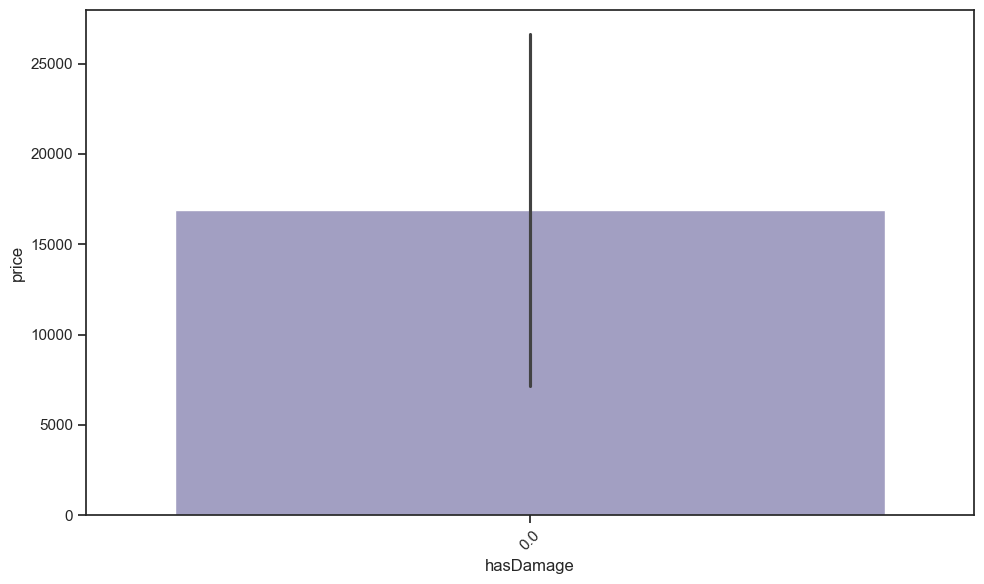

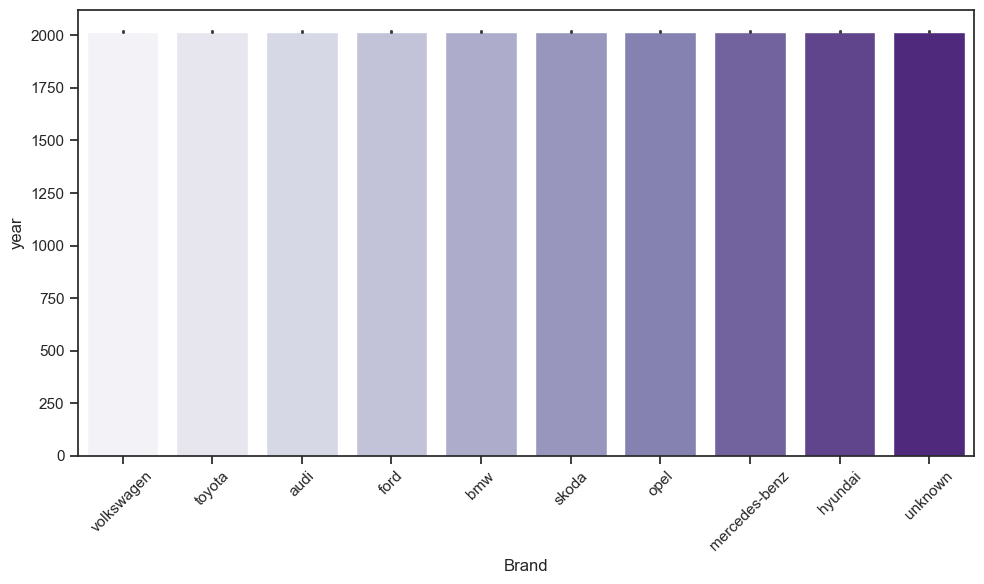

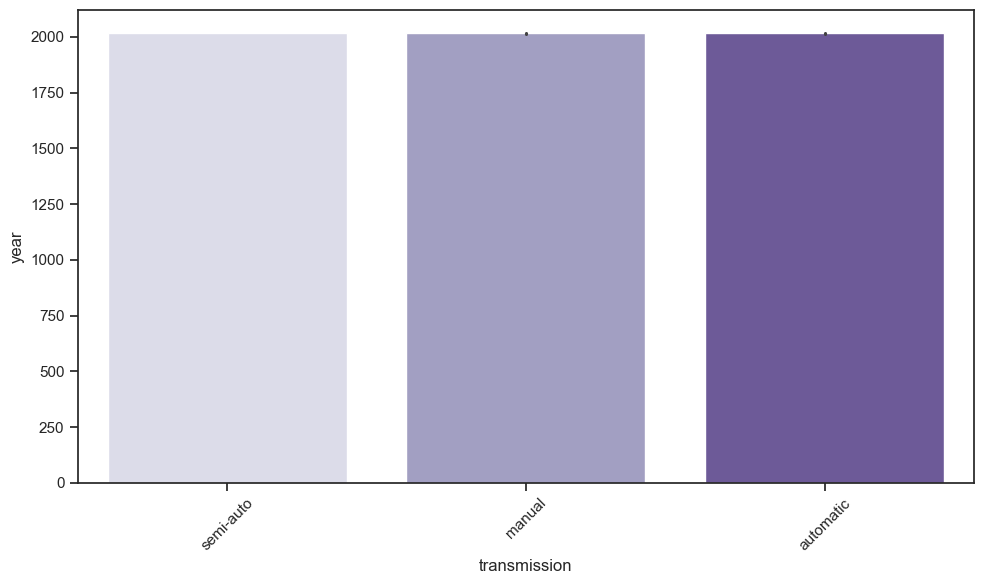

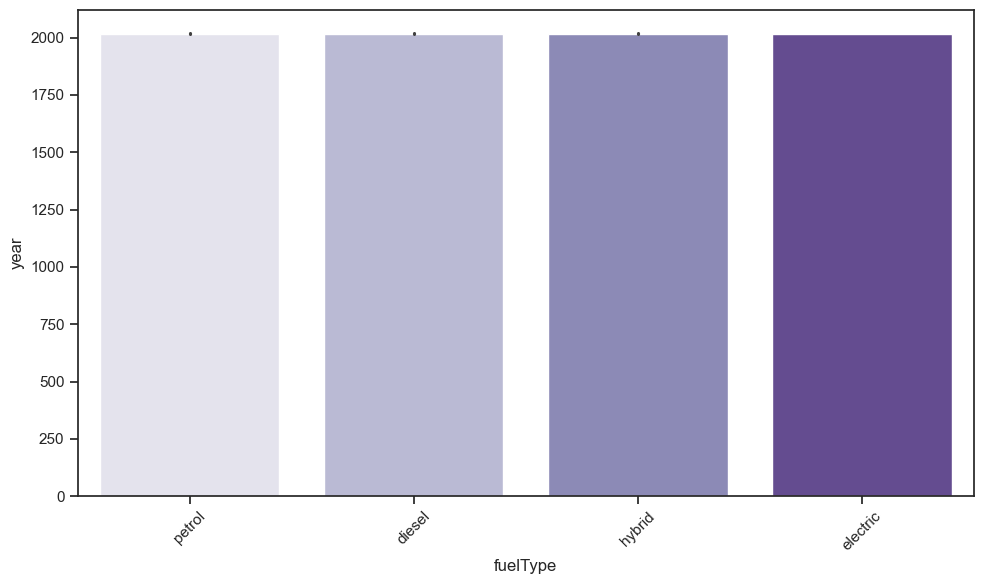

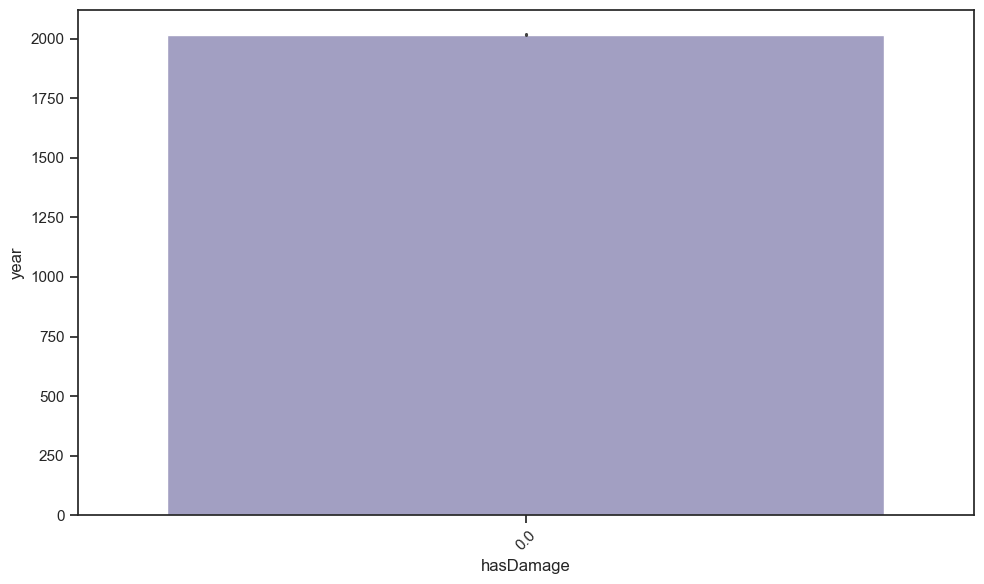

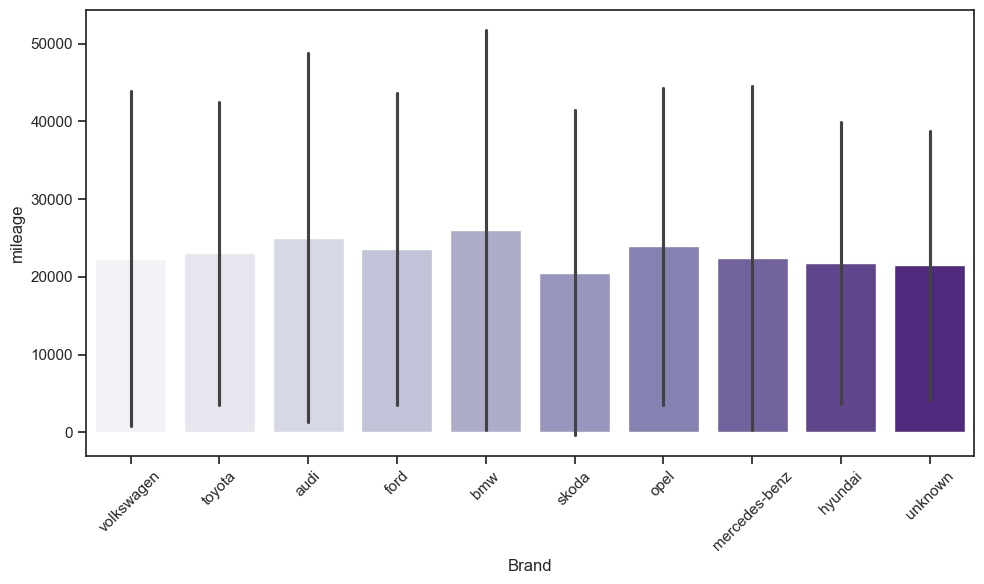

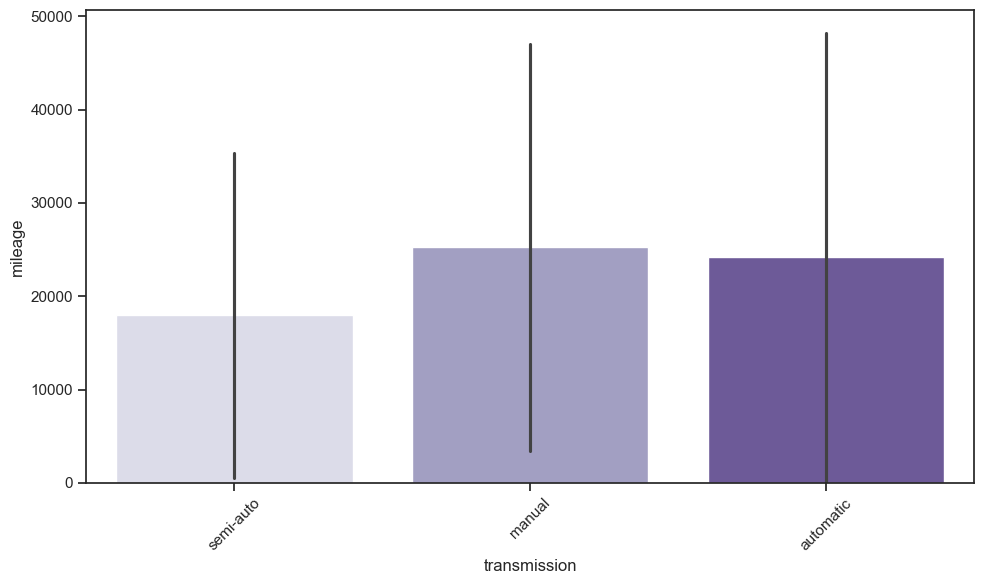

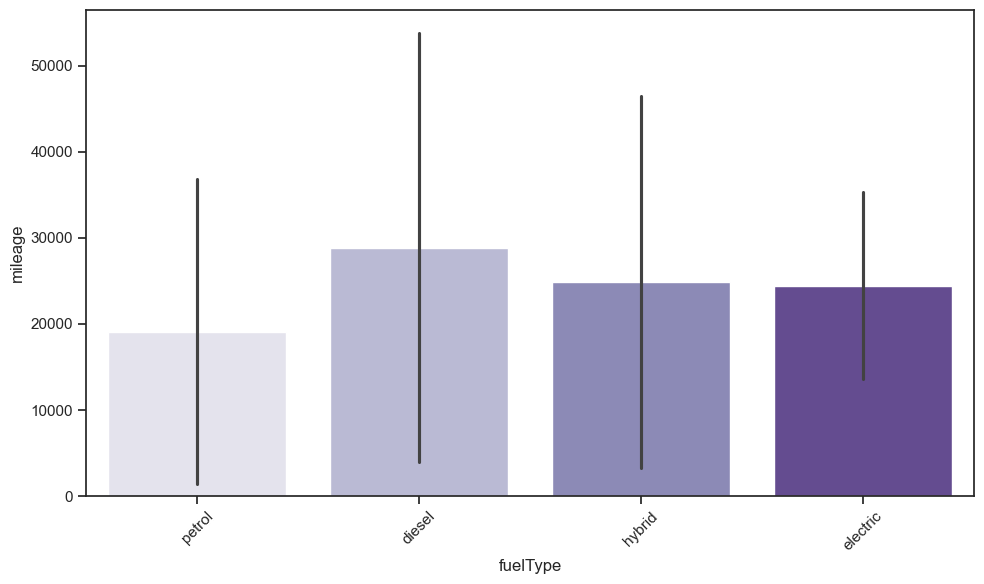

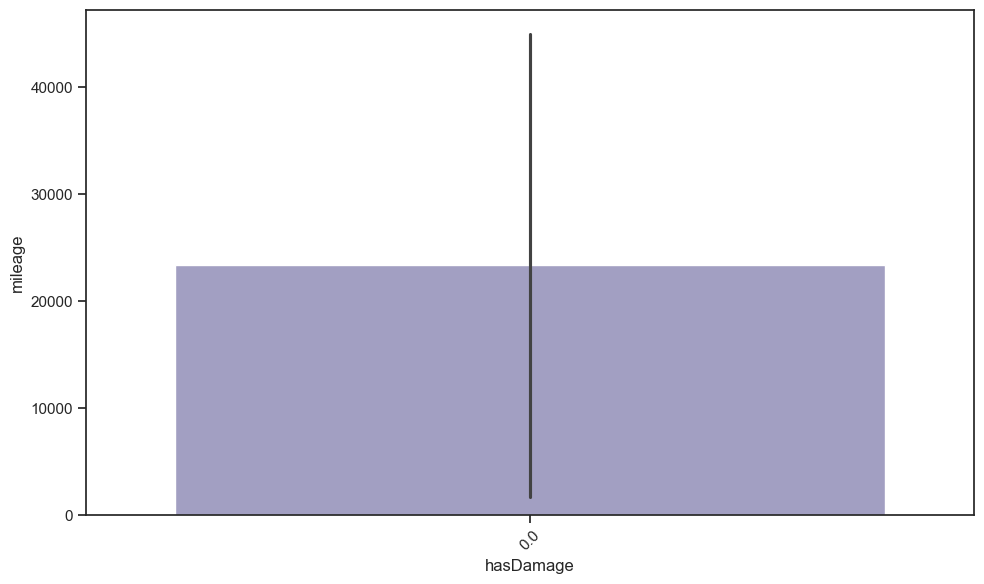

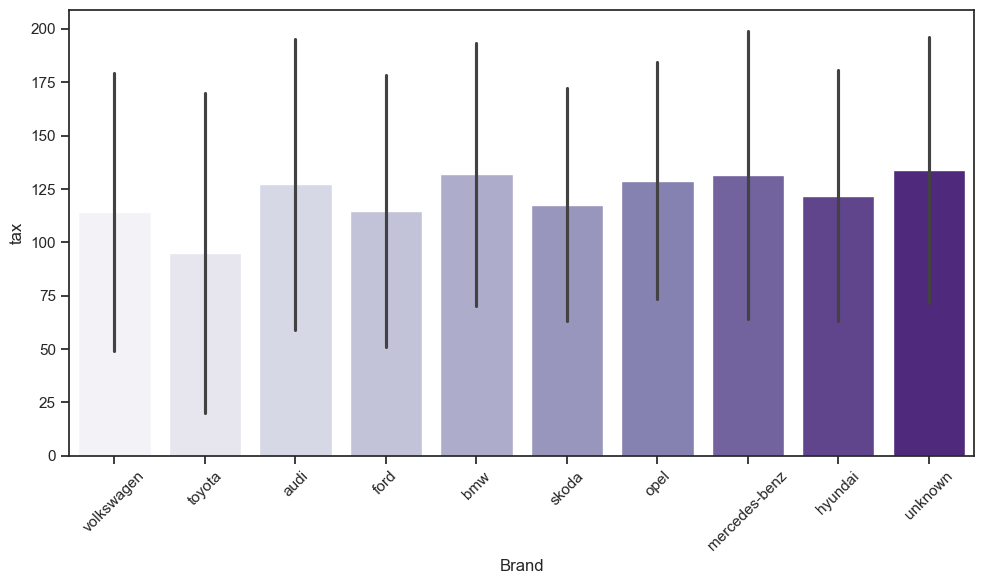

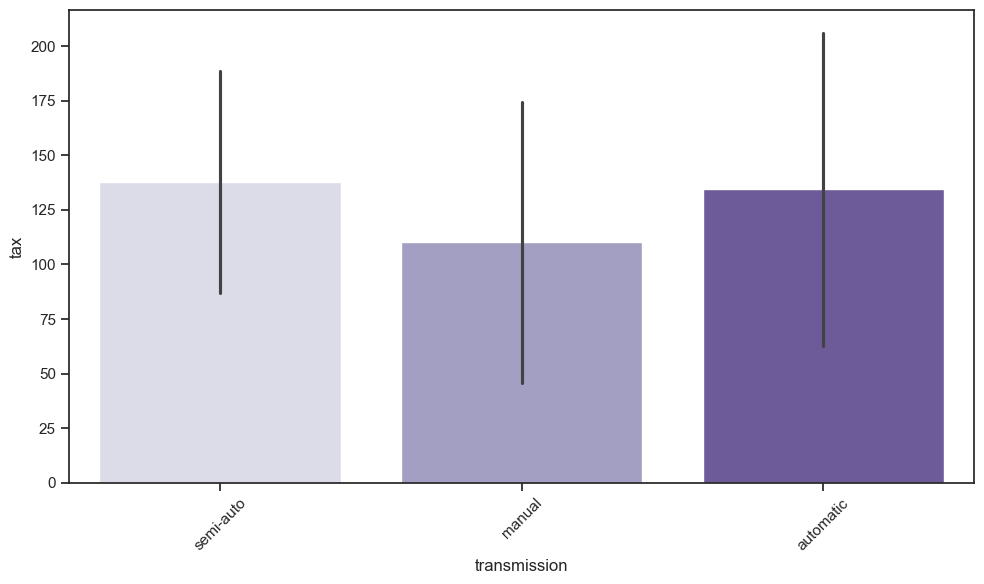

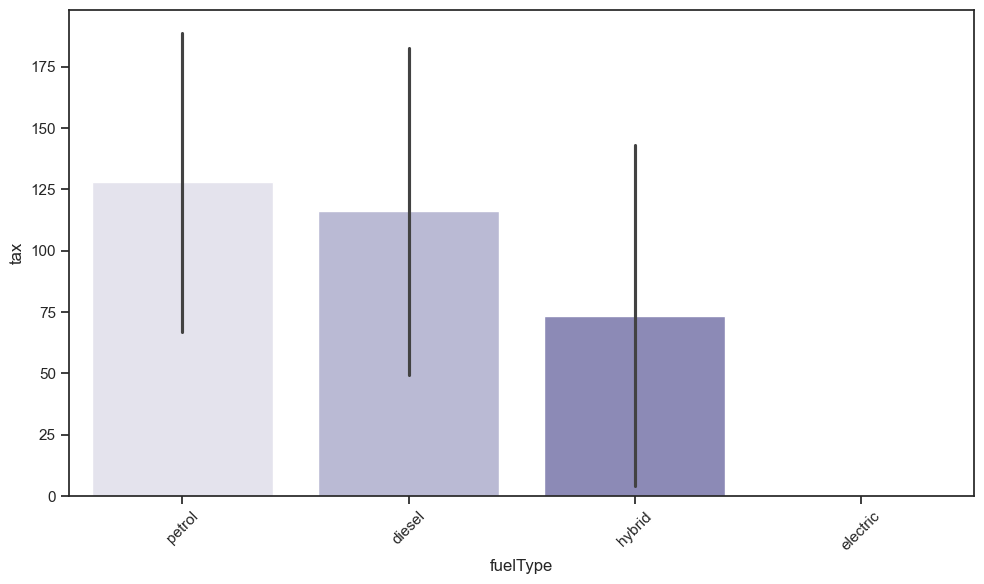

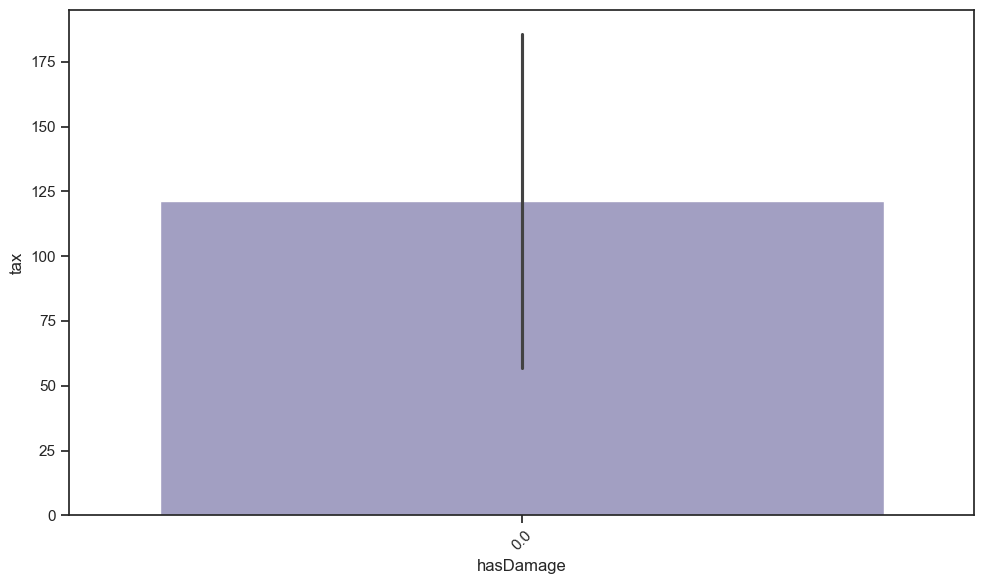

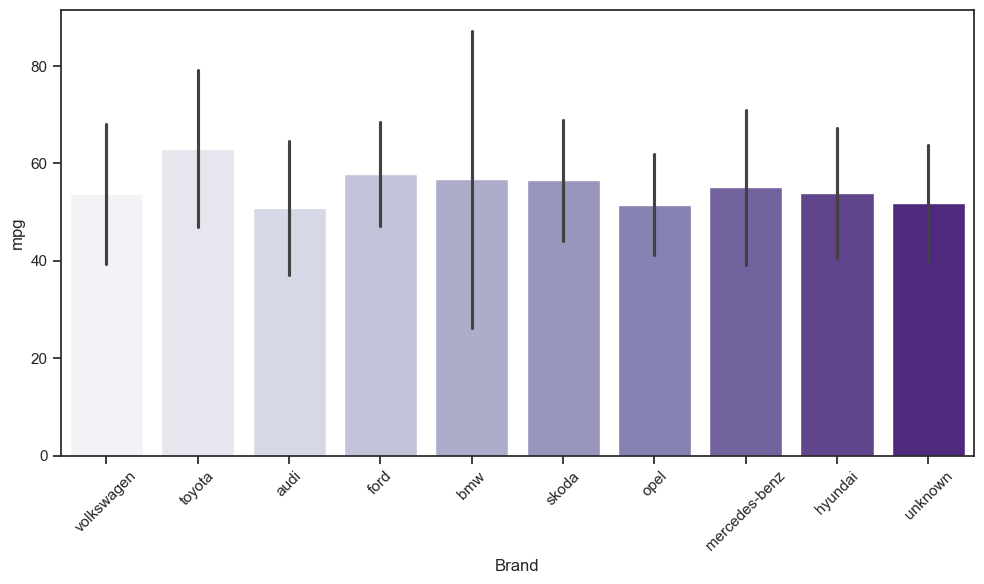

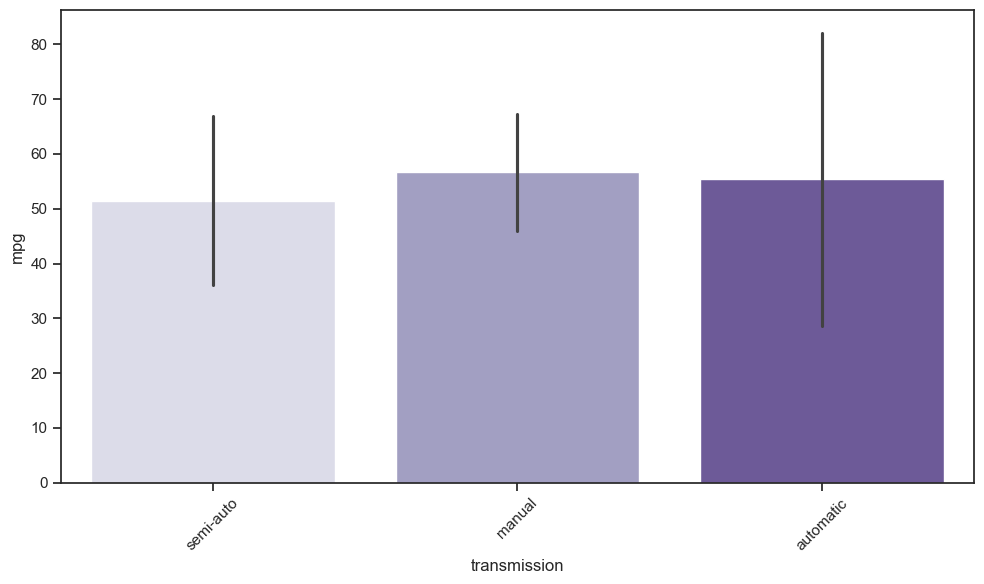

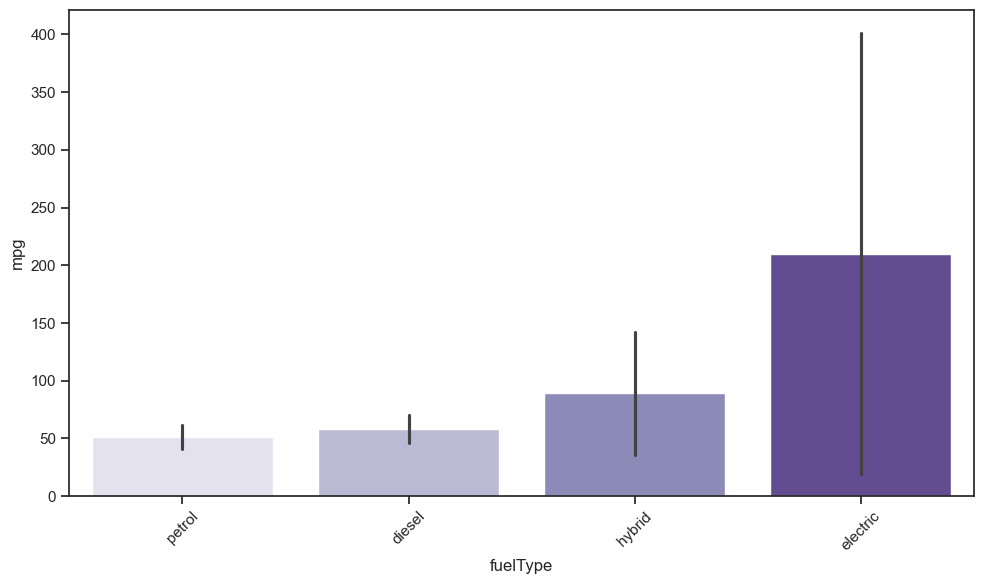

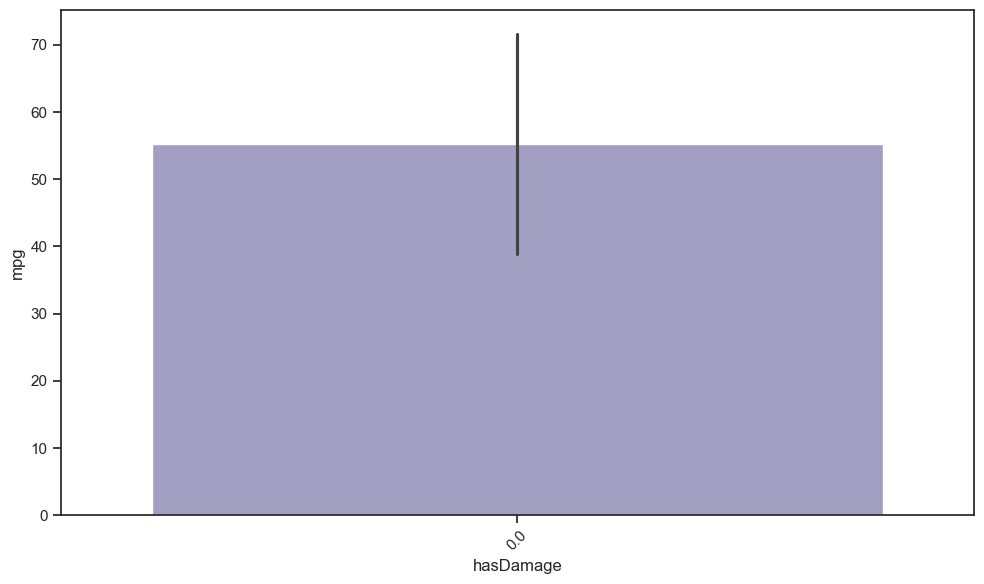

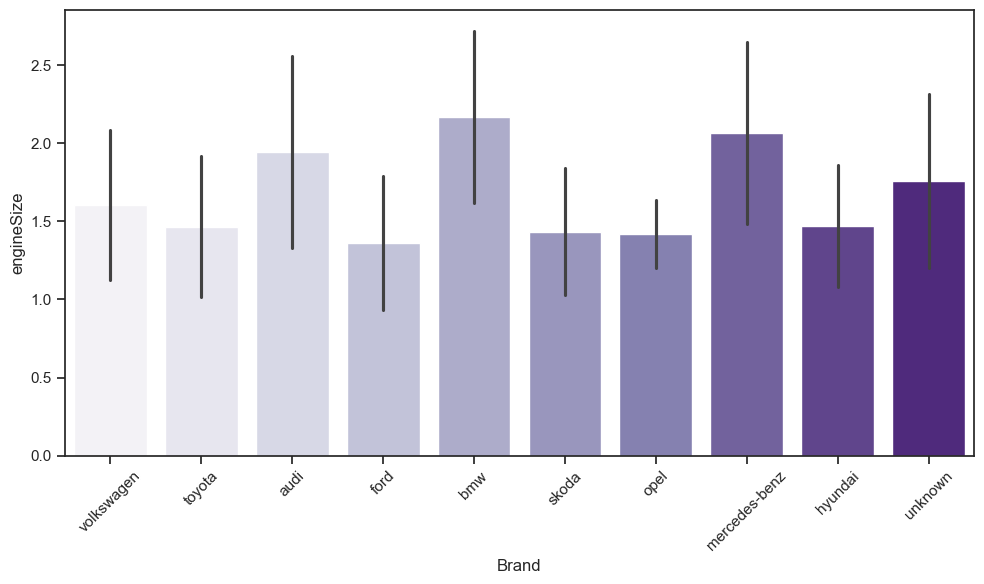

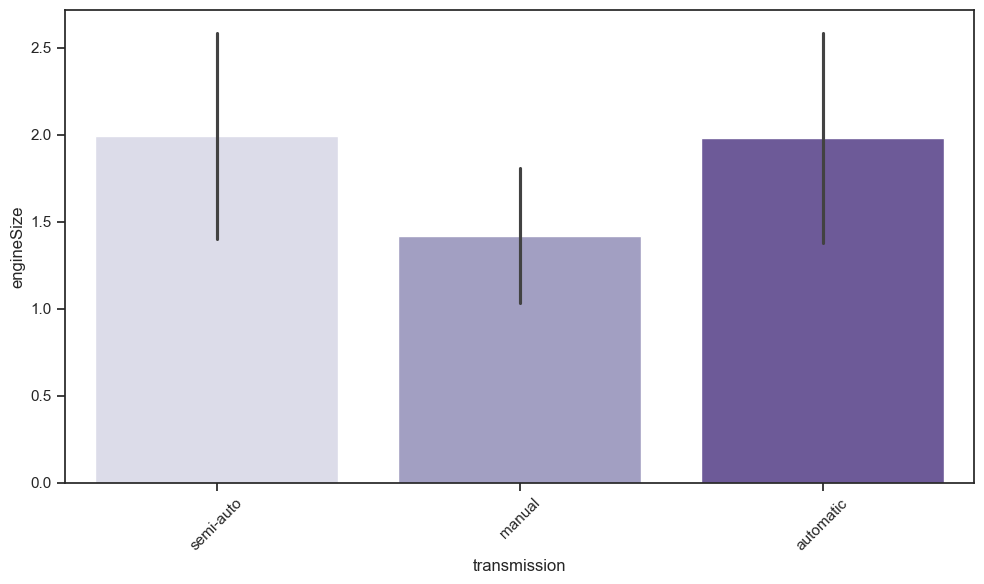

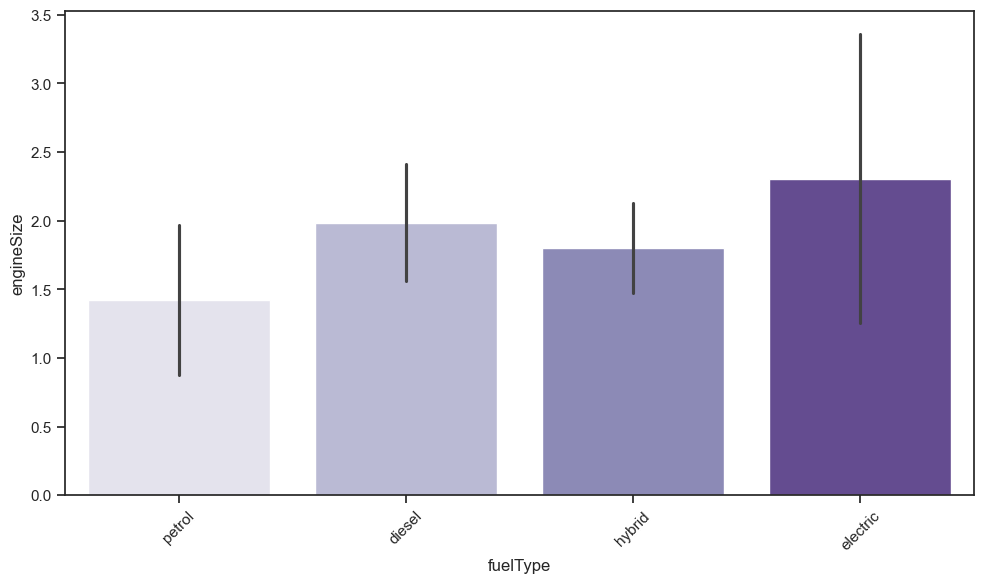

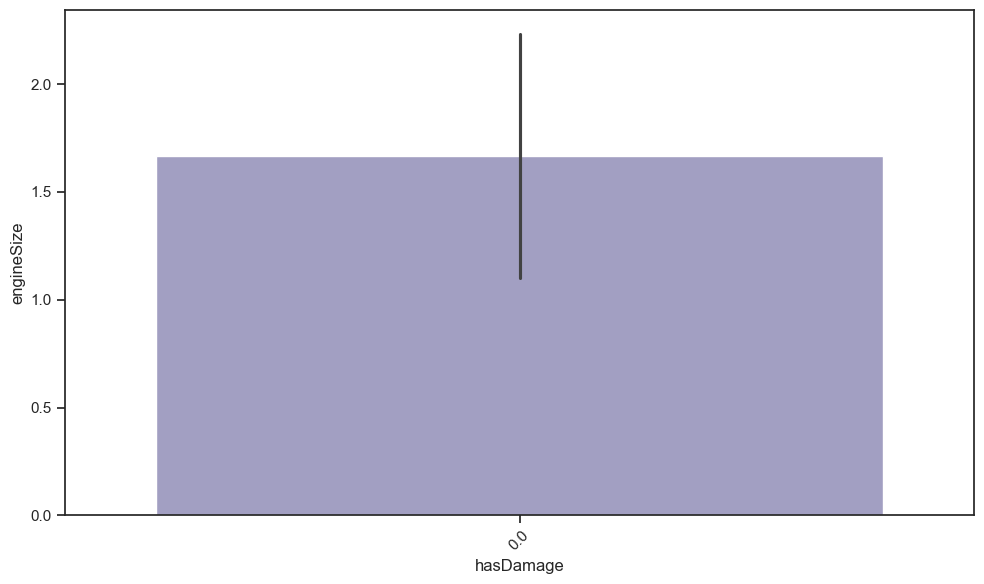

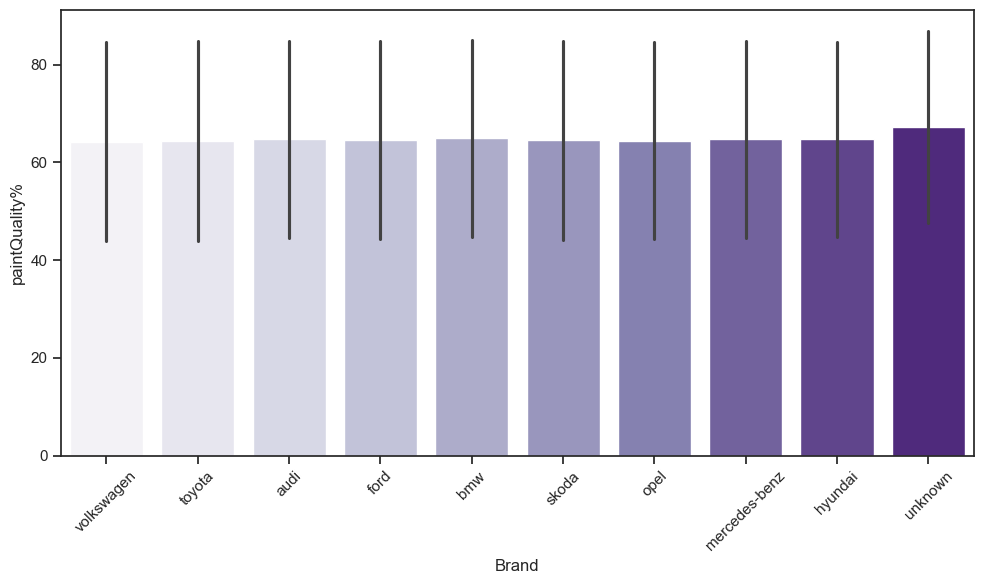

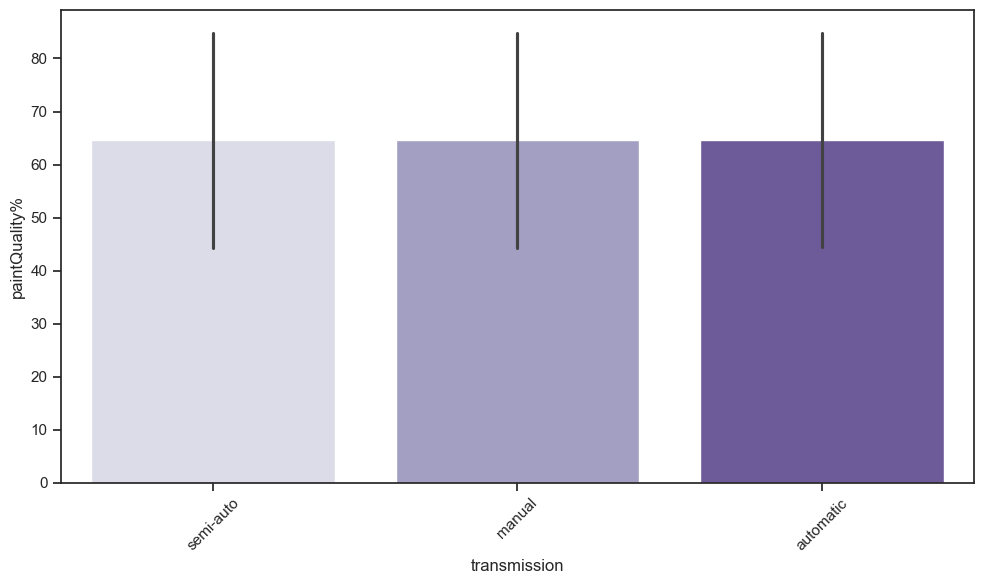

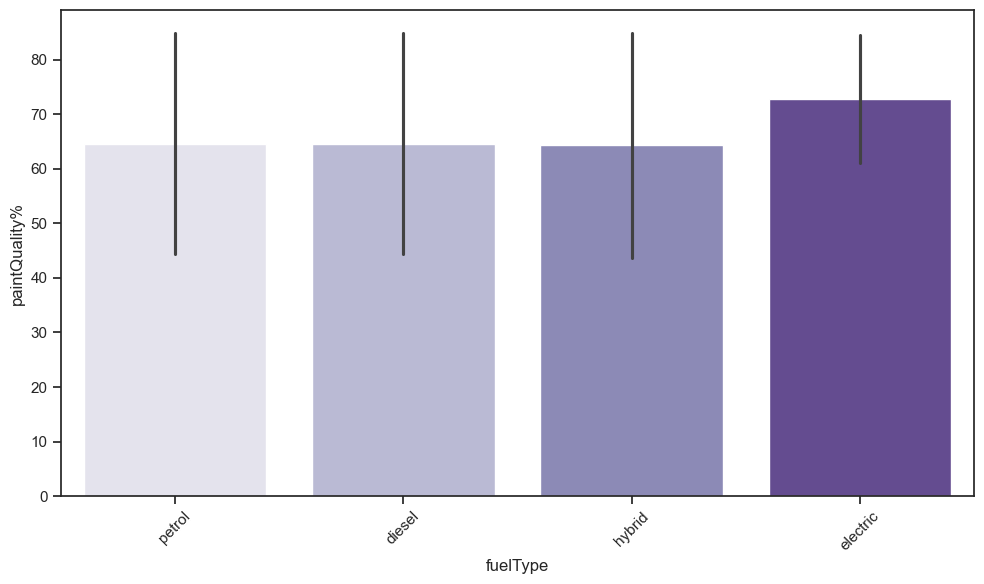

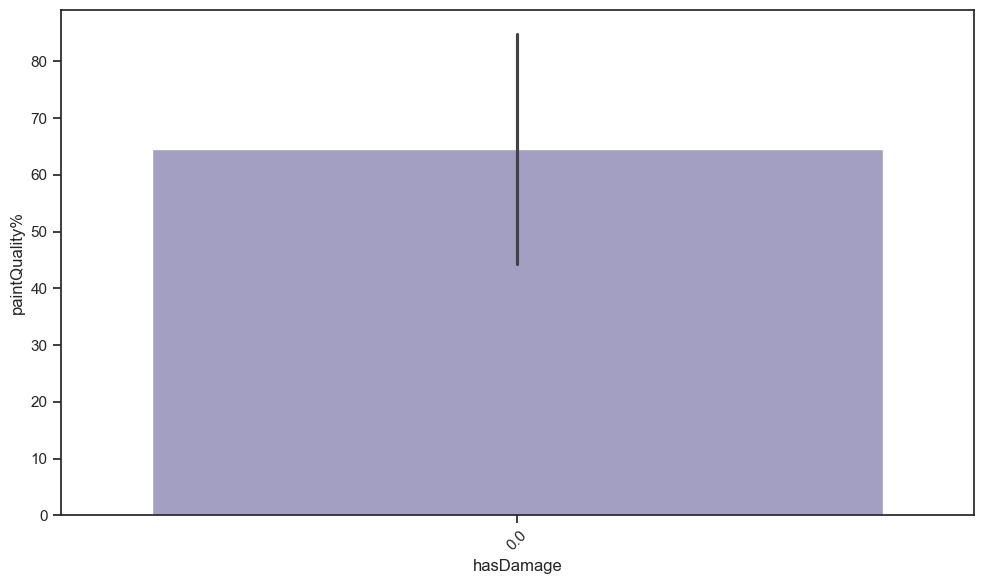

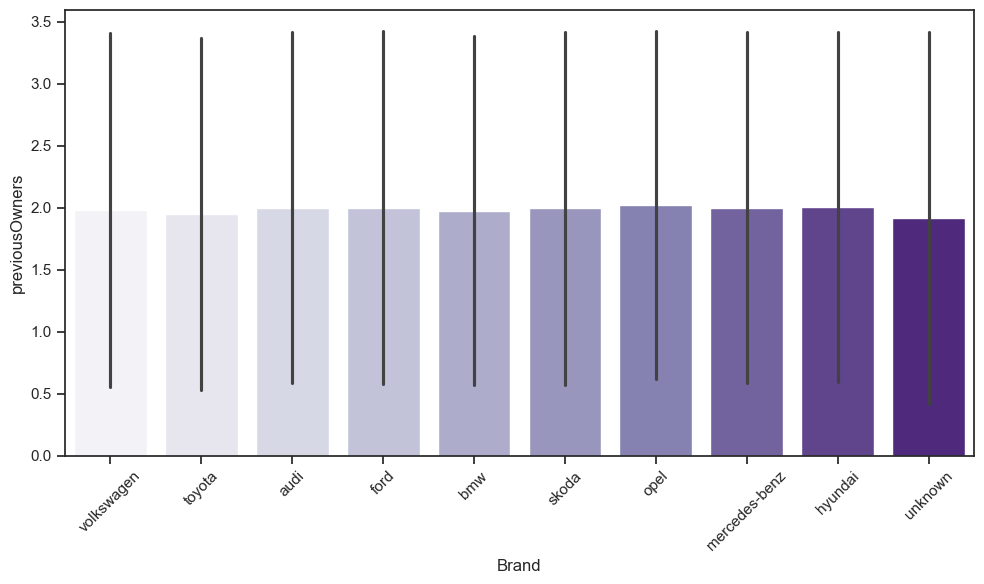

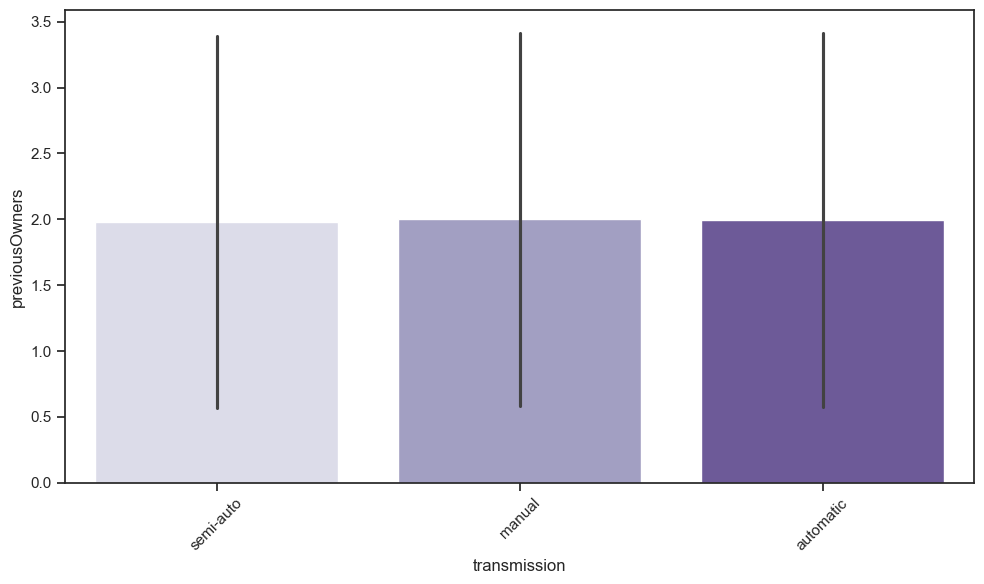

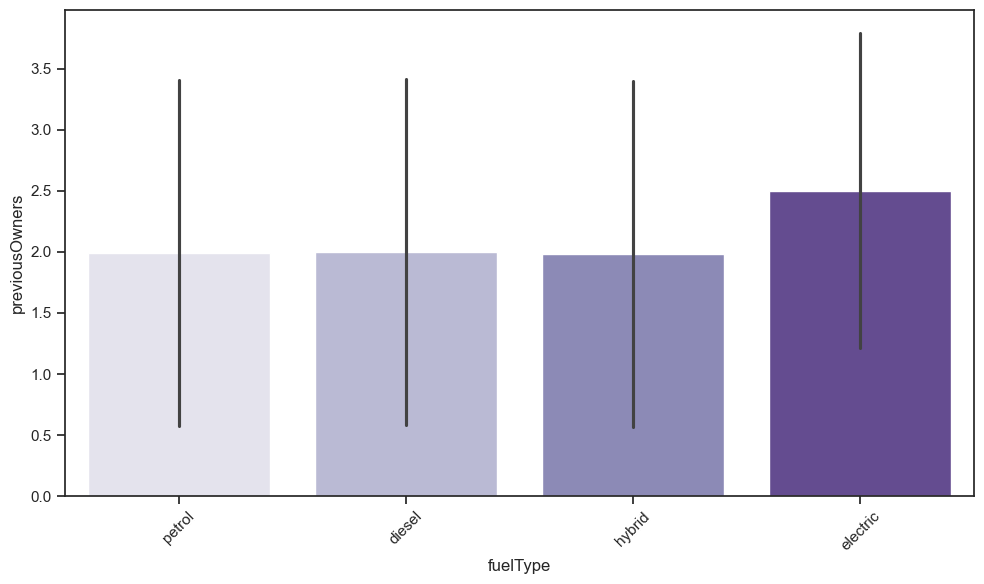

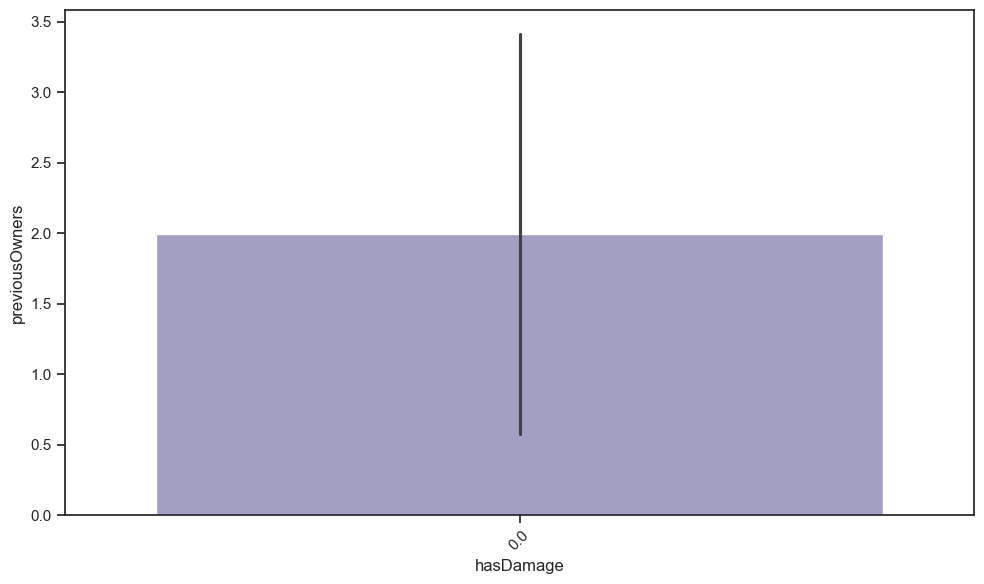

In [79]:
for column in metric_features:
    for x in [f for f in non_metric_features if f != 'model']:
        comparative_barplot(train, x, column)

***

`To improve our model in the future, valuable insights can be taken from these charts`

***

# 3. Data cleaning and Preprocessing

From duplicates and type fixes to feature creation and encodings used downstream.

## 3.1 Duplicates

Count and drop duplicate rows from train.

In [80]:
train.duplicated().sum()

0

In [81]:
train[train.duplicated(keep=False)]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage


In [82]:
train = train.drop_duplicates(subset=cols, keep='first')

## 3.2 Feature Engeneering

Create derived features and harmonize types.

### 3.2.1 Feature Creation

Replace 'year' with 'carAge' (redundant information) to reduce collinearity.

In [83]:
train['carAge'] = 2025 - train['year']

test['carAge'] = 2025 - test['year']

metric_features.append('carAge')
metric_features

['price',
 'year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners',
 'carAge']

In [84]:
print(f'The number of rows with negative carAge values is: {train.loc[train['carAge'] < (0), ['carAge']].size}')
print(f'The number of rows with non-integer carAge values are: {train.loc[(train['carAge'] != round(train['carAge'])) & (train['carAge'].notna()), ['carAge']].size}')

The number of rows with negative carAge values is: 0
The number of rows with non-integer carAge values are: 0


Since we created a new feature called "carAge" which has the "same" meaning as "year", we will drop year column

In [85]:
train.drop(columns=['year'], inplace=True)

test.drop(columns=['year'], inplace=True)

metric_features.remove('year')
train.sample(10)

,carID,Brand,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,carAge
44400,4376,audi,a1,15999,manual,34925.0,petrol,235.000000,39.8,2.0,41.0,0.0,0.0,11.0
4532,13202,bmw,5 series,20762,semi-auto,17590.0,diesel,145.000000,68.9,2.0,83.0,2.0,0.0,8.0
28309,29874,ford,fiesta,9300,manual,11474.0,petrol,145.000000,64.2,1.1,67.0,3.0,0.0,8.0
60828,56544,opel,astra,6400,automatic,23615.0,petrol,235.000000,39.2,1.6,33.0,1.0,0.0,12.0
187,3855,audi,a5,30000,semi-auto,1000.0,diesel,145.000000,50.4,2.0,79.0,0.0,0.0,5.0
14916,33522,hyundai,santa fe,34998,semi-auto,4956.0,diesel,145.000000,NaN,2.2,43.0,0.0,0.0,6.0
46848,61570,opel,mokka x,14750,manual,7931.0,petrol,145.000000,39.2,1.4,32.0,NaN,0.0,6.0
46301,72751,volkswagen,tiguan,11698,manual,88407.0,diesel,145.000000,53.3,2.0,82.0,1.0,0.0,9.0
30242,34893,mercedes-benz,c class,21099,semi-auto,9272.0,diesel,20.000000,67.3,2.1,48.0,1.0,0.0,9.0
54037,13343,bmw,1 series,21995,semi-auto,17820.0,petrol,316.487189,39.8,3.0,57.0,4.0,0.0,8.0


### 3.2.2 Data Type Conversions

Decide which numeric columns should be integers vs floats and convert accordingly.

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           75973 non-null  string 
 2   model           75973 non-null  string 
 3   price           75973 non-null  int64  
 4   transmission    75973 non-null  object 
 5   mileage         74141 non-null  float64
 6   fuelType        75973 non-null  object 
 7   tax             67691 non-null  float64
 8   mpg             68011 non-null  float64
 9   engineSize      74193 non-null  float64
 10  paintQuality%   73723 non-null  float64
 11  previousOwners  73689 non-null  float64
 12  hasDamage       74425 non-null  float64
 13  carAge          74482 non-null  float64
dtypes: float64(8), int64(2), object(2), string(2)
memory usage: 8.1+ MB


mileage

In [87]:
train['mileage'].sample(20)

38581    24756.0
53967    16898.0
38278    29384.0
7704      1411.0
37457    18323.0
34417    36800.0
1486     42959.0
31927     9588.0
71898     4131.0
73751     7495.0
17956    37075.0
59472    19693.0
61818      249.0
19362    38573.0
2285     17600.0
51788    75626.0
48286    81025.0
60408     2500.0
51254    45108.0
45044     6776.0
Name: mileage, dtype: float64

In [88]:
train.loc[(train['mileage'].notna()) & (train['mileage'] % 1 != 0), 'mileage']

5        101153.348285
92        86705.854885
752       85454.586292
1106      86705.854885
1127      83688.655392
1300      86705.854885
1301      83688.655392
1419      82584.134420
1448      85454.586292
1667      80106.708565
1989      85454.586292
2183      83688.655392
2185      86705.854885
2186      86705.854885
2256     101153.348285
2380      80184.930036
2439      80106.708565
2615      85454.586292
2785     101153.348285
2961      83688.655392
3206      82584.134420
3221      86705.854885
3370      86705.854885
3427      85454.586292
3590      85454.586292
3608      80184.930036
3723      80184.930036
3819      82584.134420
3859      86705.854885
4087      86705.854885
4280      85454.586292
4807      86705.854885
4921      95204.181674
5195      82584.134420
5298      83688.655392
5384      86705.854885
5688     101153.348285
5708      85454.586292
5717      86705.854885
6054      82584.134420
6231      86705.854885
6314      80106.708565
6940     101153.348285
6961      8

In [89]:
((train['mileage'].notna()) & (train['mileage'] % 1 != 0)).sum()

386

Since the majority of the values aren't floats, we will convert them to integer

tax

In [90]:
train['tax'].sample(20)

11932      NaN
9471     145.0
69396    125.0
67226      0.0
38097      NaN
22344    145.0
69955    145.0
447        0.0
8537     145.0
34829    145.0
56971    145.0
37129    150.0
27103    145.0
57382    125.0
25080      NaN
53413     20.0
68579     30.0
9372       0.0
10273    200.0
72554     30.0
Name: tax, dtype: float64

In [91]:
train.loc[(train['tax'].notna()) & (train['tax'] % 1 != 0), 'tax']

249      326.028233
468      303.148891
585      299.473504
773      299.473504
1610     290.486785
1616     326.028233
1787     290.486785
1790     299.473504
1946     303.148891
2064     327.915778
2689     316.487189
2705     316.487189
2736     299.473504
2889     290.486785
2929     326.028233
3172     303.148891
3291     303.148891
3374     290.486785
3512     316.296306
3531     316.487189
3611     290.486785
4011     277.384254
4017     290.486785
4141     303.148891
4380     316.487189
4677     290.486785
4715     299.473504
5038     303.148891
5295     316.296306
5480     316.487189
5750     316.487189
5965     290.486785
6039     316.487189
6298     299.473504
6318     327.915778
6447     303.148891
6585     294.843409
6897     290.486785
7198     316.296306
7208     326.028233
7346     326.028233
7421     316.487189
8083     299.473504
8114     316.487189
8399     299.473504
8495     326.028233
8788     316.487189
9036     290.486785
9429     303.148891
10126    326.028233


In [92]:
((train['tax'].notna()) & (train['tax'] % 1 != 0)).sum()

381

Since the majority of the values aren't floats, we will convert them to integer

mpg

In [93]:
train['mpg'].sample(20)

45831    52.3
33823    44.1
65081    57.7
63840    33.6
49006    48.7
58215    51.4
61035    45.6
66243    47.1
5866     57.6
73477    61.4
30557     NaN
20927    47.1
51993    60.1
30139    62.8
50721    56.5
1454     78.5
27972    57.7
6099     42.2
36162    34.5
2440     60.1
Name: mpg, dtype: float64

In [94]:
train.loc[(train['mpg'].notna()) & (train['mpg'] % 1 != 0), 'mpg']

0        11.417268
1        47.900000
2        40.900000
3        65.700000
4        42.800000
           ...    
75967    56.500000
75968    53.300000
75969    47.900000
75971    60.100000
75972    64.200000
Name: mpg, Length: 66370, dtype: float64

We should leave it as a float

engineSize

In [95]:
train['engineSize'].sample(20)

9025     1.0
62500    2.0
27956    1.4
65629    1.2
38905    1.0
25855    2.0
62329    1.5
67959    1.6
43791    1.0
71421    2.0
40762    2.0
48908    1.5
34923    1.4
57463    2.1
26654    1.4
65510    1.5
74275    2.0
42900    2.0
8416     1.4
59306    1.4
Name: engineSize, dtype: float64

In [96]:
train.loc[(train['engineSize'].notna()) & (train['engineSize'] % 1 != 0), 'engineSize']

1        1.5
2        1.5
4        1.5
6        1.4
7        1.6
        ... 
75963    1.5
75964    2.1
75966    1.2
75967    2.1
75972    1.1
Name: engineSize, Length: 36333, dtype: float64

We should leave it as a float

paintQuality%

In [97]:
train['paintQuality%'].sample(20)

11879    86.0
62716    31.0
18057    55.0
48171    39.0
11047    47.0
17712    78.0
18640    76.0
72480    61.0
62162    91.0
43910    76.0
15046    77.0
3584     68.0
17954    76.0
18820    58.0
50510    36.0
20777    45.0
57777    82.0
24428    73.0
2191     78.0
24260     NaN
Name: paintQuality%, dtype: float64

In [98]:
train.loc[(train['paintQuality%'].notna()) & (train['paintQuality%'] % 1 != 0), 'paintQuality%']

Series([], Name: paintQuality%, dtype: float64)

Since there are no paintQuality% values whith decimal places, let's convert it into integer

previousOwners  

In [99]:
train['previousOwners'].sample(20)

6293     0.0
17173    2.0
64555    2.0
23133    4.0
57639    1.0
73502    2.0
12856    4.0
56583    1.0
24114    1.0
39863    0.0
59982    2.0
22553    NaN
61944    1.0
16490    0.0
57055    2.0
9302     2.0
27701    1.0
36216    0.0
55032    3.0
50901    0.0
Name: previousOwners, dtype: float64

In [100]:
train.loc[(train['previousOwners'].notna()) & (train['previousOwners'] % 1 != 0), 'previousOwners']

Series([], Name: previousOwners, dtype: float64)

Since there are no previousOwners values whith decimal places, let's convert it into integer

carAge

In [101]:
train['carAge'].sample(20)

3747      8.0
3697      6.0
11407     8.0
63909     6.0
39864    11.0
26973     8.0
64804     6.0
1295      6.0
20871     8.0
62804     7.0
32422    11.0
1700      7.0
63605     6.0
38309     8.0
11839    10.0
43225     6.0
74852     7.0
10860    11.0
74662     7.0
65928     6.0
Name: carAge, dtype: float64

In [102]:
train.loc[(train['carAge'].notna()) & (train['carAge'] % 1 != 0), 'carAge']

Series([], Name: carAge, dtype: float64)

Since there are no carAge values whith decimal places, let's convert it into integer

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           75973 non-null  string 
 2   model           75973 non-null  string 
 3   price           75973 non-null  int64  
 4   transmission    75973 non-null  object 
 5   mileage         74141 non-null  float64
 6   fuelType        75973 non-null  object 
 7   tax             67691 non-null  float64
 8   mpg             68011 non-null  float64
 9   engineSize      74193 non-null  float64
 10  paintQuality%   73723 non-null  float64
 11  previousOwners  73689 non-null  float64
 12  hasDamage       74425 non-null  float64
 13  carAge          74482 non-null  float64
dtypes: float64(8), int64(2), object(2), string(2)
memory usage: 8.1+ MB


In [104]:
def data_type_convert(input_df):

    #Data type conversions
    #mileage
    input_df['mileage'] = input_df['mileage'].round().astype('Int64')
    #tax
    input_df['tax'] = input_df['tax'].round().astype('Int64')
    #paintQuality%
    input_df['paintQuality%'] = input_df['paintQuality%'].round().astype('Int64')
    #previousOwners
    input_df['previousOwners'] = input_df['previousOwners'].round().astype('Int64')
    #carAge
    input_df['carAge'] = input_df['carAge'].round().astype('Int64')

    return input_df

In [105]:
train = data_type_convert(train)

test = data_type_convert(test)

Now everything is in the right Dtype

### 3.2.3 Encoding before Train-Test Split

OHE is deterministic (no target leakage), so we can encode before splitting.

In [106]:
non_metric_features

['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']

In [107]:
train['model'].nunique()

204

We will only use OHE for Brand, transmission and fueltype. Since model has a lot more unique values, we will use

In [108]:
categorical_cols = non_metric_features.copy()

In [109]:
categorical_cols.remove('model')

In [110]:
categorical_cols.remove('hasDamage')

In [111]:
categorical_cols

['Brand', 'transmission', 'fuelType']

In [112]:
non_metric_features

['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']

This function will make the OHE encoding changes

In [113]:
def OneHotEncoder_catcols(input_df):
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # OHE
    encoded_array = ohe.fit_transform(input_df[categorical_cols])
    encoded_cols  = ohe.get_feature_names_out(categorical_cols)
    encoded_df    = pd.DataFrame(encoded_array, columns=encoded_cols, index=input_df.index)

    # choose metrics based on existing or not column price
    has_price = 'price' in input_df.columns
    metrics   = metric_features if has_price else [c for c in metric_features if c != 'price']

    parts = [input_df[metrics], encoded_df]
    for extra in ['model', 'hasDamage']:
        if extra in input_df.columns:
            parts.append(input_df[[extra]])

    input_df_encoded = pd.concat(parts, axis=1)
    return input_df_encoded

In [115]:
train_OHE = OneHotEncoder_catcols(train)

test_OHE = OneHotEncoder_catcols(test)

In [116]:
test_OHE['carID'] = test['carID'].values

In [117]:
train_OHE.sample(10)

,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,model,hasDamage
56696,8450,46831,125,61.4,1.8,92,4,12,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,b class,0.0
47342,8151,25138,145,55.4,1.4,53,3,7,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,corsa,0.0
71799,25995,7868,145,60.1,1.6,46,3,6,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,c class,0.0
51721,11698,10500,0,65.7,1.0,54,4,8,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,fiesta,0.0
45682,8240,38944,<NA>,43.5,1.6,40,1,10,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,mokka,0.0
71727,10500,<NA>,150,54.3,1.0,34,0,7,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,fiesta,0.0
2613,17495,5479,145,53.3,1.4,54,2,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,superb,0.0
36902,23299,1650,145,55.4,2.0,97,1,6,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,b class,0.0
15317,17795,18103,145,60.1,2.0,30,2,7,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,golf,0.0
34896,11793,113000,145,54.3,2.0,89,1,10,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,x3,0.0


In [118]:
train_OHE.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'carAge', 'Brand_audi', 'Brand_bmw', 'Brand_ford',
       'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel', 'Brand_skoda',
       'Brand_toyota', 'Brand_unknown', 'Brand_volkswagen',
       'transmission_automatic', 'transmission_manual',
       'transmission_semi-auto', 'fuelType_diesel', 'fuelType_electric',
       'fuelType_hybrid', 'fuelType_petrol', 'model', 'hasDamage'],
      dtype='object')

# 4. Export

Save tables for use in next notebooks.

In [119]:
train_OHE.to_csv('./train_data_EDA.csv')
test_OHE.to_csv('./test_data_EDA.csv')